# Theoretical Neuroscience - Chapter 2 Exercises
## Table of Contents
- [Exercise 1](##exercise-1)
    - [Exercise 1.1](##solution-1.1)
    - [Exercise 1.2](##solution-1.2)
    - [Exercise 1.3](##solution-1.3)
    - [Exercise 1.4](##solution-1.4)
- [Exercise 2](##exercise-2)
    - [Exercise 2.1](##solution-2.1)
    - [Exercise 2.2](##solution-2.2)
    - [Exercise 2.3](##solution-2.3)
    - [Exercise 2.4](##solution-2.4)
    - [Exercise 2.5](##solution-2.5)
    - [Exercise 2.6](##solution-2.6)
- [Exercise 3](##exercise-3)
    - [Exercise 3.1](##solution-3.1)
    - [Exercise 3.2](##solution-3.2)
- [Exercise 4](##exercise-4)
- [Exercise 5](##exercise-5)
- [Exercise 6](##exercise-6)
    - [Exercise 6.1](##solution-6.1)
    - [Exercise 6.2](##solution-6.2)
    - [Exercise 6.3](##solution-6.3)
    - [Exercise 2.4](##solution-2.4)
    - [Exercise 2.5](##solution-2.5)
- [Exercise 7](##exercise-7)
    - [Exercise 7.1](##solution-7.1)
    - [Exercise 7.2](##solution-7.2)
- [Exercise 8](##exercise-8)
    - [Exercise 8.1](##solution-8.1)
    - [Exercise 8.2](##solution-8.2)
- [Exercise 9](##exercise-9)
    - [Exercise 9.1](##solution-9.1)
    - [Exercise 9.2](##solution-9.2)
- [Exercise 10](##exercise-10)
    - [Exercise 10.1](##solution-10.1)
    - [Exercise 10.2](##solution-10.2)
    - [Exercise 10.3](##solution-10.3)
- [Exercise 11](##exercise-11)
    - [Exercise 11.1](##solution-11.1)
    - [Exercise 11.2](##solution-11.2)
    - [Exercise 11.3](##solution-11.3)
- [Exercise 12](##exercise-12)
    - [Exercise 12.1](##solution-12.1)
    - [Exercise 12.2](##solution-12.2)
- [Exercise 13](##exercise-13)
    - [Exercise 13.1](##solution-13.1)
    - [Exercise 13.2](##solution-13.2)
- [Exercise 14](##exercise-14)
- [Exercise 15](##exercise-15)
    - [Exercise 15.1](##solution-15.1)
    - [Exercise 15.2](##solution-15.2)
- [Exercise 16](##exercise-16)
    - [Exercise 16.1](##solution-16.1)
    - [Exercise 16.2](##solution-16.2)

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1
Use the rate given by equation 2.1 with r0 = 50 Hz and $$D(\tau)=-\cos\left(\frac{2\pi(\tau-20 \text{ ms})}{140 \text{ms}}\right)\exp\left(-\frac{\tau}{60 \text{ ms}}\right)\text{ Hz/ms}$$ to predict the response of a neuron of the electrosensory lateral-line lobe to a stimulus. 
1. Use an approximate Gaussian white noise stimulus constructed by choosing a stimulus value every 10 ms from a Gaussian distribution with zero mean and variance $\sigma_s ^2/\Delta t$ with $\sigma_s^2=10$. 
2. Compute the firing rate over a 10 s period. 
3. From the results, compute the firing rate-stimulus correlation function $Q_{rs}(\tau)$.
4. Using equation 2.6, compare $Q_{rs}(-\tau)/\sigma_s ^2$ with the kernel $D(\tau)$ given above.


## Solution 1.1
Since the stimulus at any time point is not dependent on the stimulus at any other time point we can generate all values concurrently. Moreover, the variance is just $$\frac{\sigma_s ^2}{\Delta t} = \frac{10}{0.01}=1000.$$

In [137]:
def get_approximate_white_noise_stim(T, dt, mean = 0, std = 1):
    """
    Generates approximate white noise stimulus.

    Parameters
    ----------
    T : float
        The duration of time to generate stimulus for.
    dt : float
        The temporal resolution to use.
    mean : float
        The mean stimulus value. (Default is 0)
    std : float
        The standard deviation of the stimulus. (Default is 1)

    Returns
    -------
    white_noise : array_like
        An array of approximate white noise stimulus.
    """

    white_noise = np.random.normal(loc = mean, scale = std, size = int(T/dt))
    return white_noise

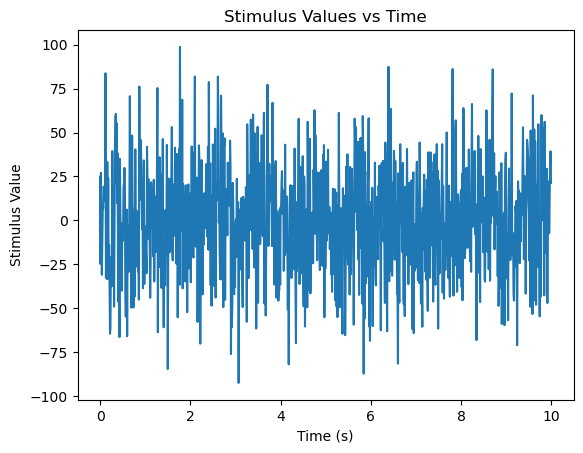

In [138]:
dt = 1e-2
stim = get_approximate_white_noise_stim(10, dt, 0, np.sqrt(1000))
plt.plot([i*dt for i in range(int(10/dt))], stim)
plt.title('Stimulus Values vs Time')
plt.xlabel("Time (s)")
plt.ylabel("Stimulus Value");

## Solution 2.2
To compute the firing rate we must use equation 2.1 which gives $$r_{\text{est}} = r_0 + \int_0^\infty D(\tau)s(t-\tau) d\tau.$$ To implement this We must first generate the kernel given.

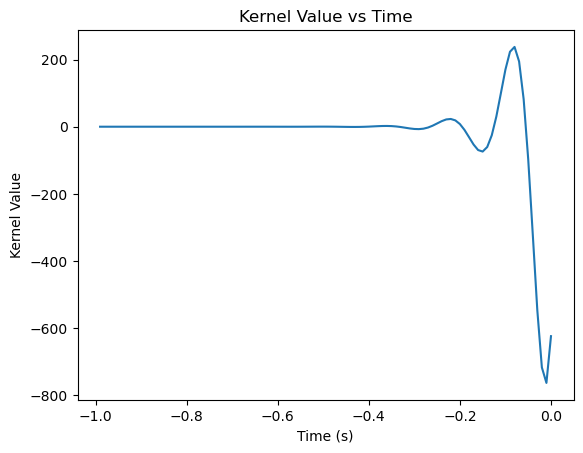

In [139]:
time = np.array([-i*dt for i in range(int(10/dt))])
# Multiply the kernel values by 1000 to convert from Hz/ms.
D = 1000*np.array([-np.cos(2*np.pi*(-t - 0.02)/0.14)*np.exp(t/0.06) for t in time])
plt.plot(time[:int(1/dt)], D[:int(1/dt)])
plt.title("Kernel Value vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Kernel Value");

Now we can implement equation 2.1 as follows. 

In [140]:
def get_firing_rate_estimate(r0, kernel, stim, dt, tau):
    """
    Calculates the firing rate estimate at time t.

    Parameters
    ----------
    r0 : float
        The background firing rate.
    kernel : array_like
        An array which describes the contribution of a stimulus at different time lags.
    stim : array_like
        An array representing stimulus values at different time steps.
    dt : float
        The temporal resolution of the stimulus array.
    tau : float
        The time point to estimate the firing rate at.

    Returns
    -------
    r_est : float
        The estimate of the firing rate at time tau.
    """

    stim_tau = np.roll(stim, -int(tau/dt))
    r_est = r0 + np.sum(kernel * stim_tau)*dt

    return r_est

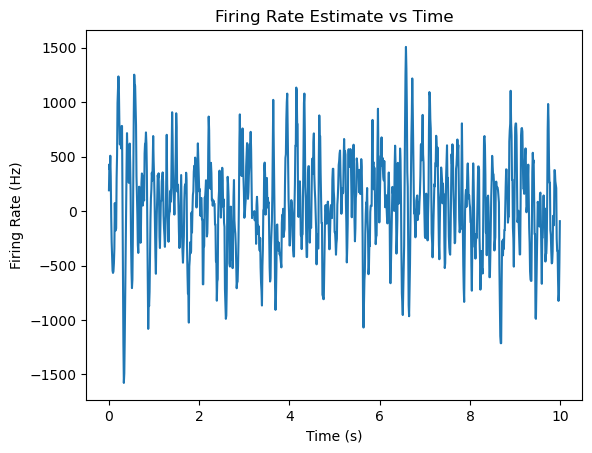

In [141]:
times = [i*dt for i in range(int(10/dt))]
r_est = [get_firing_rate_estimate(50, D, stim, dt, tau) for tau in times]
plt.plot(times, r_est);
plt.title("Firing Rate Estimate vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Firing Rate (Hz)");

## Solution 1.3
We can now use our firing rate-stimulus correlation code from chapter 1 to get:

In [142]:
def get_firing_rate_stimulus_correlation(s, r, T, dt, tau):
    """
    Calculates the correlation of a firing rate and stimulus given a lag time.

    Parameters
    ----------
    s : array_like
        A list of stimulus values.
    r : array_like
        The firing rate in Hz.
    T : float
        The duration of the stimulus sequence in seconds.
    dt : float
        The time step size in seconds
    tau : float
        The lag time to use in seconds.

    Returns
    -------
    q : array_like
        The correlation of the firing rate and stimulus sequence given a lag of tau.
    """

    s_tau = np.roll(s, -int(tau/dt))

    q = (1/T)*np.sum(r*s_tau*dt)

    return q

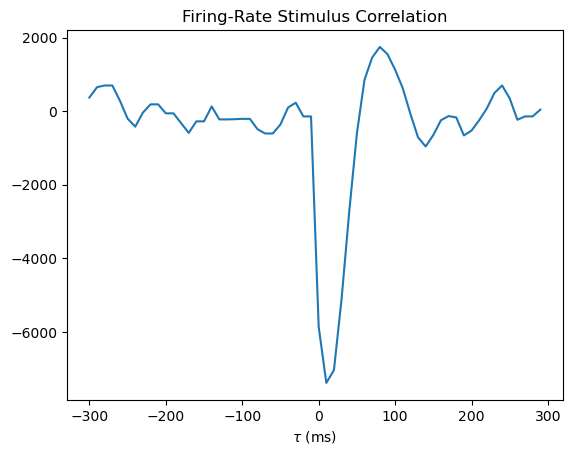

In [143]:
taus = np.array([i*dt -0.3 for i in range(int(0.6/dt))])
qrs = [get_firing_rate_stimulus_correlation(stim, r_est, 10, dt, tau) for tau in taus]
plt.plot(taus*1000, qrs)
plt.title("Firing-Rate Stimulus Correlation")
plt.xlabel(r'$\tau$ (ms)');

## Solution 1.4
Equation 2.6 states that $Q_{rs}(-\tau)/\sigma_s ^2 = D(\tau)$. We can use our firing rate-stimulus code again to calculate  $Q_{rs}(-\tau)/\sigma_s ^2$ and plot it along side our kernel to show that this holds.

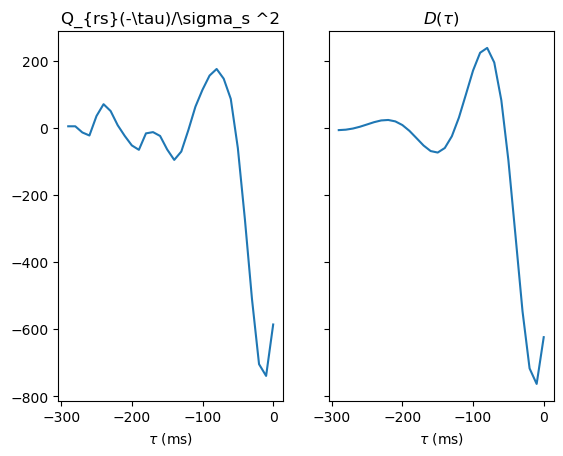

In [144]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

taus = np.array([-i*dt for i in range(int(0.3/dt))])
qrs = np.array([get_firing_rate_stimulus_correlation(stim, r_est, 10, dt, -tau) for tau in taus])
qrs /= 10
axs[0].plot(taus*1000, qrs)
axs[0].set_title(r'$Q_{rs}(-\tau)/\sigma_s^2$')
axs[0].set_xlabel(r'$\tau$ (ms)')

D = np.array([1000*-np.cos(2*np.pi*(-t - 0.02)/0.14)*np.exp(t/0.06) for t in taus])
axs[1].plot(taus*1000, D)
axs[1].set_title(r'$D(\tau)$')
axs[1].set_xlabel(r'$\tau$ (ms)');

We can see from the plots above that equation 2.6 holds.

## Exercise 2
Given data as described in chapter 1 exercise 8:
1. Use the spike-triggered average to construct a linear kernel and use it in equation 2.1 to provide a model of the response of the H1 neuron.  Choose `r0` so that the average firing rate predicted by the model in response to the stimulus used for the data matches the actual average firing rate. 
2. Use a Poisson generator with the computed rate to generate a synthetic spike train from this linear estimate of the firing rate in response to the stimulus `stim`.
3. Plot examples of the actual and synthetic spike trains. How are they similar and how do they differ? 
4. Plot the autocorrelation function of the actual and the synthetic spike trains over the range 0 to 100 ms. Why is there a dip at a lag of 2 ms in the autocorrelation of the actual spike train? Is there a dip for the synthetic train too? 
5. Plot the interspike interval histogram for both spike trains. Why is there a dip below 6 ms in the histogram for the actual spike train? 
5. What are the coefficients of variation for the two spike trains and why might they differ?

## Solution 2.1
Equation 2.6 gives that for white noise stimulus the kernel that provides the optimal linear estimate of the firing rate is $$D(\tau)=\frac{\langle r \rangle C(\tau)}{\sigma_s^2}.$$ We can read in our data and then calculate all the necessary quantities to derive the model response of the H1 neuron.

In [145]:
with open('data/c1p8.pickle', 'rb') as f:
    data = pkl.load(f)
rho = data['rho']
stim = data['stim']

In [234]:
def get_spike_triggered_average(rho, stim, T, dt, tau, time_axis = None):
    """
    Calculates the spike-triggered average stimulus.

    Parameters
    ----------
    rho : array_like
        The neural response array.
    stim : array_like
        The stimulus array.
    T : float
        The duration of the spike train in seconds.
    dt : float
        The temporal resolution of the stimulus array.
    tau : float
        The time lag to calculate the spike-triggered average for in seconds.
    time_axis : int
        The axis which orders the stimulus array by time. (Default is None)
    Returns
    -------
    C : float
        The spike-triggered average stimulus.
    """

    n = sum(rho)
    s_tau = np.roll(stim, int(tau/dt), axis = time_axis)
    C = (1/n)*np.sum(rho*s_tau, axis = time_axis)

    return C

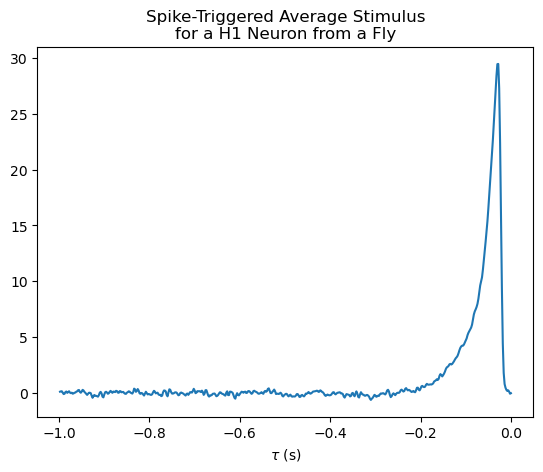

In [147]:
T = 20*60
dt = 0.002

taus = [-i*0.001 for i in range(0, 1000, 2)]
sta = np.array([get_spike_triggered_average(rho, stim, T, dt, -tau) for tau in taus])

plt.plot(taus, sta)
plt.title('Spike-Triggered Average Stimulus\nfor a H1 Neuron from a Fly')
plt.xlabel(r'$\tau$ (s)');
sta = np.flip(sta)

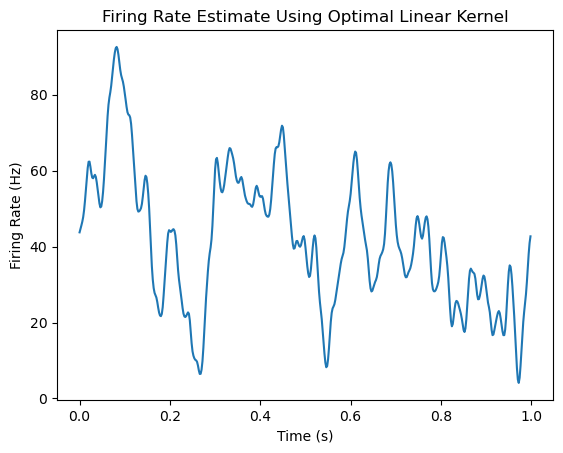

In [148]:
r = np.sum(rho)/T
sigma = np.std(stim)
D = sta*r/(sigma)
taus = [i*0.001 for i in range(0, 1000, 2)]
r_est = np.array([get_firing_rate_estimate(np.sum(rho)/T, D, stim[:500], 0.002, tau) for tau in taus])

plt.plot(taus, r_est)
plt.title("Firing Rate Estimate Using Optimal Linear Kernel")
plt.xlabel("Time (s)")
plt.ylabel("Firing Rate (Hz)");

## Solution 2.2
We can now reuse our Poisson generator from chapter one and our estimate of the firing rate to generate a synthetic spike train.

In [149]:
def generate_poisson_spikes(rate, T, dt=1e-5, as_times = True):
    """
    Generates a spike train as a Poisson process.

    Parameters
    ----------
    rate : {float, array_like}
        The firing rate in Hz. 
        If a float is given a constant firing rate is used.
        If an array is given the value at index i is the firing rate at time step i.
    T : float
        The duration of time to generate spikes for.
    dt : float
        The time step size.
   
    Returns
    -------
    spikes : array_like
        A list of times at which spikes were generated.
    """

    #Since the probability at each time step is intependent we can compare the firing rates at all time steps simultaneously.
    spikes = np.where(rate*dt >= np.random.rand(int(T/dt)), 1, 0)

    # To convert from a list where a 1 at index i indicates a spike at time step i, to a list of times at which spikes occur
    # we simply select all indices at which a spike occurs and multiply the index by the time step size.  
    if as_times:
        spikes = np.linspace(0,T, int(T/dt), endpoint=False)[np.where(spikes == 1)]
    return spikes

In [150]:
spikes = generate_poisson_spikes(r_est, 1, 0.002)

## Solution 2.3
To compare our synthetic and actual spike trains we can generate spike trains from different points in time in response to white noise stimulus which generated the actual spike trains and plot the results.

In [151]:
def get_neural_response(spikes, T, dt=1e-5):
    """
    Calculates the neural response.

    Parameters
    ----------
    spikes : array_like
        A list of times at which spikes occur.
    T : float
        The duration of time simulated in seconds.
    dt : float
        The time step size to use.

    Returns
    -------
    rho : array_like
        neural response array where the value at index i is the number of spikes at time step i.
    """

    bins = np.linspace(0, T, int(T/dt)+1)
    rho = np.histogram(spikes, bins)[0]

    return rho

Since the kernel tends to 0 outside as $\tau$ increases we can append zeros to generate a longer spike train without sacrificing computational efficiency.

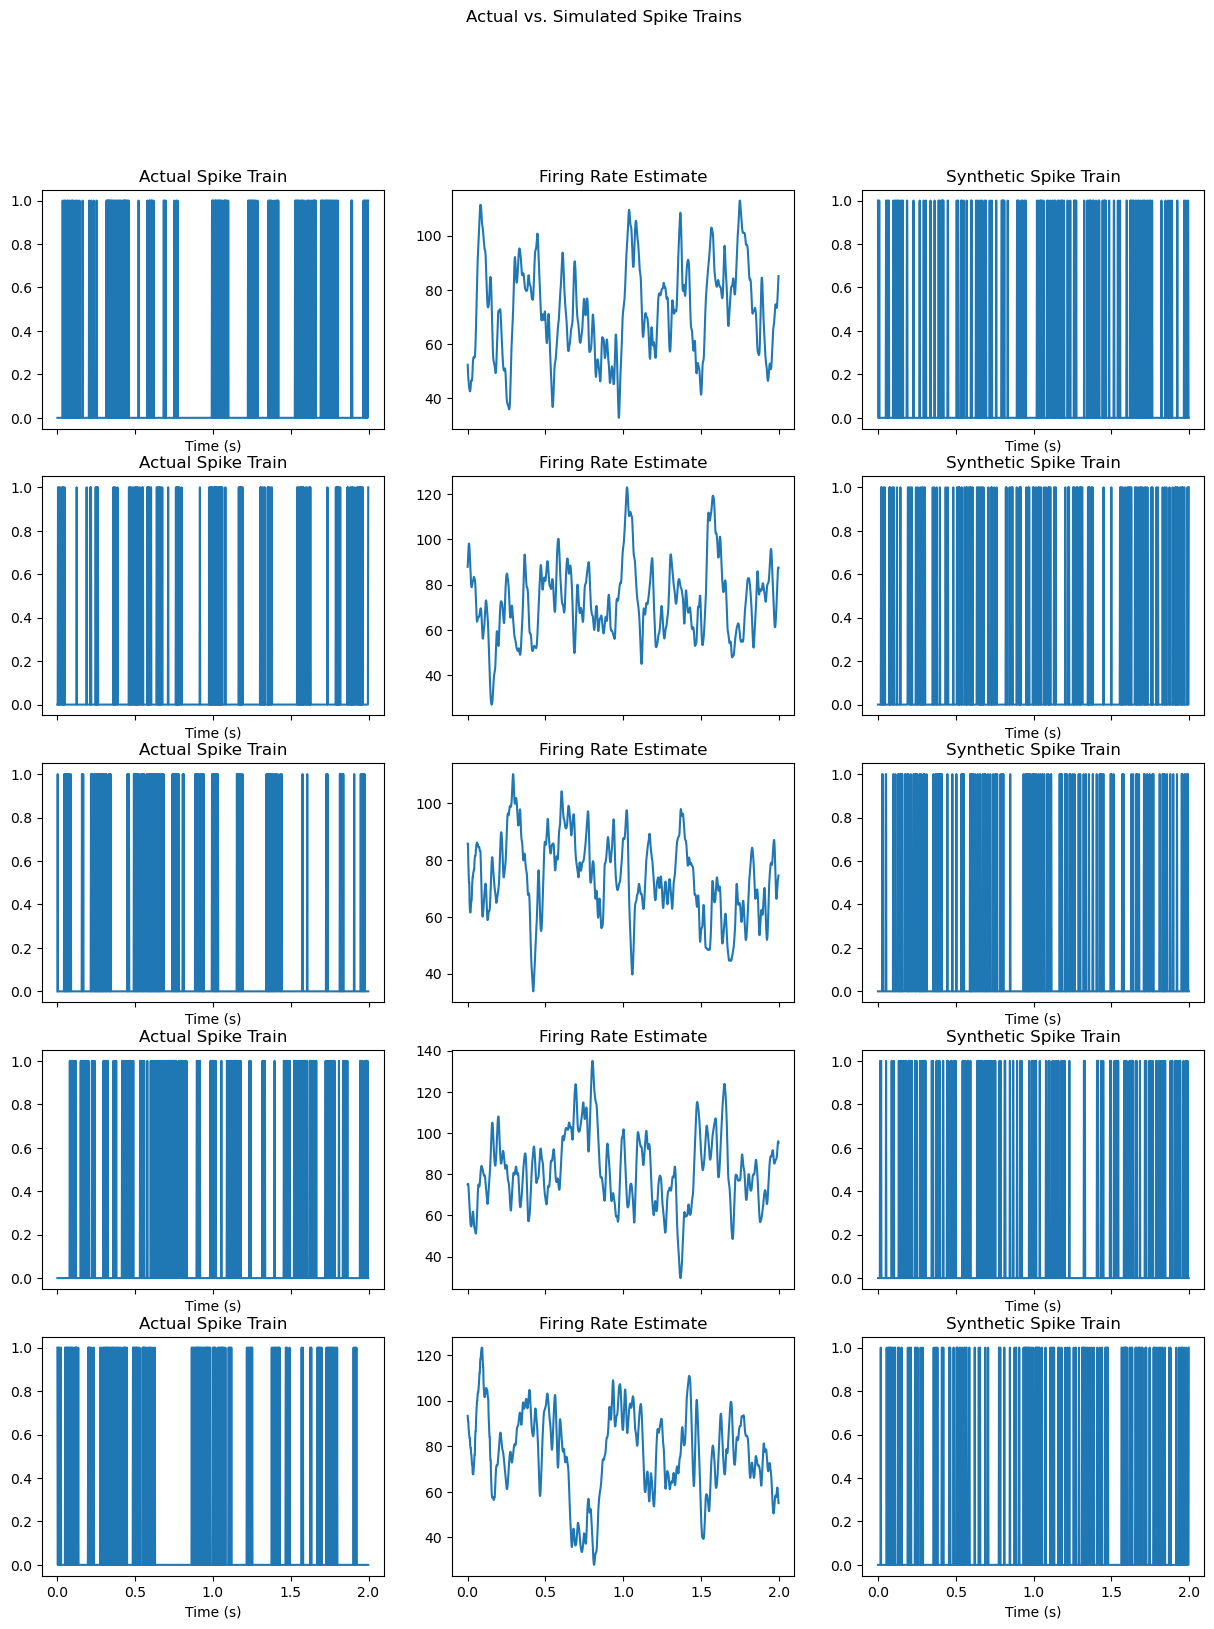

In [152]:
fig, axs = plt.subplots(5, 3, sharex=True, sharey=False)
fig.suptitle("Actual vs. Simulated Spike Trains")
fig.set_figheight(18)
fig.set_figwidth(15)

taus = [i*0.001 for i in range(0, 10000, 2)]

r_est = np.array([get_firing_rate_estimate(np.sum(rho[:5000])/10, np.concatenate([np.zeros(5000 - len(D)), D]), stim[:5000], 0.002, tau) for tau in taus])
spikes = generate_poisson_spikes(r_est, 10, 0.002)
rho_est = get_neural_response(spikes, 10, 0.002)
time = [t*dt for t in range(int(2/dt))]
for i in range(5):


    axs[i][0].plot(time, rho[int(2/0.002)*i:int(2/0.002)*(i+1)])
    axs[i][0].set_title("Actual Spike Train")
    axs[i][0].set_xlabel("Time (s)")
    axs[i][1].plot(time, r_est[int(2/0.002)*i:int(2/0.002)*(i+1)])
    axs[i][1].set_title("Firing Rate Estimate")
    axs[i][2].plot(time, rho_est[int(2/0.002)*i:int(2/0.002)*(i+1)])
    axs[i][2].set_title("Synthetic Spike Train")
    axs[i][2].set_xlabel("Time (s)");

Comparing the synthetic and actual spike trains we can see that both contain simular quantities of spikes, long gaps are much more common in our actual data than our synthetic data.

## Solution 2.4
To plot the spike train autocorrelation we can reuse our `get_spike_train_autocorrelation` code from the chapter one exercises. 

In [153]:
def get_spike_train_autocorrelation(rho, T, dt, tau):
    """
    Calculates the autocorrelation of a spike train given a lag time.

    Parameters
    ----------
    rho : array_like
        The neural response array.
    T : float
        The duration of time simulated in seconds.
    tau : float
        The lag time to use in seconds.

    Returns
    -------
    q : array_like
        The autocorrelation of the spike train given a lag of tau.
    """

    r_avg = np.mean(rho)
    rho_tau = np.roll(rho, int(tau/dt))

    q = (1/T)*np.sum((rho - r_avg)*(rho_tau - r_avg))

    return q

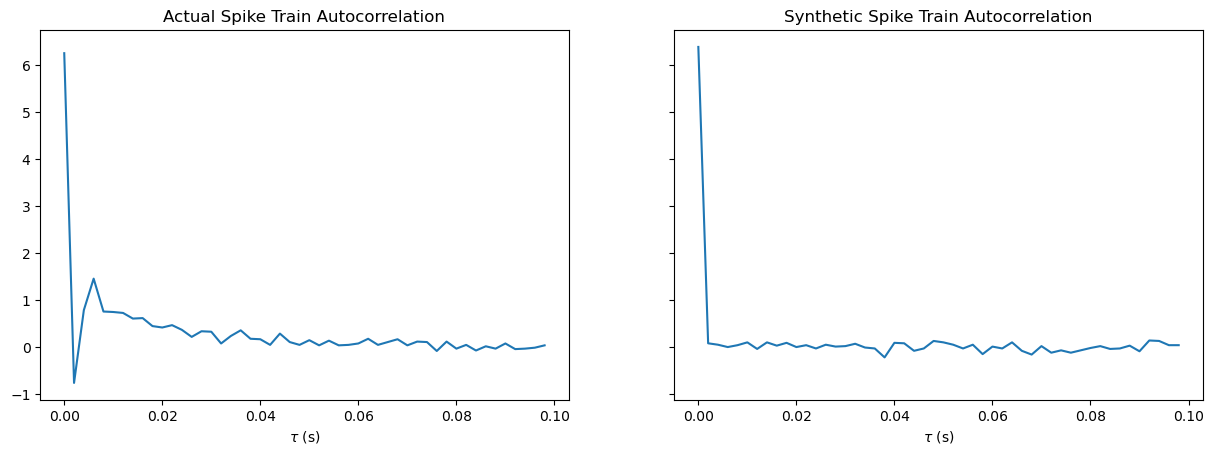

In [154]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(15)

taus = [i*0.001 for i in range(0, 100, 2)]

auto_corr = [get_spike_train_autocorrelation(rho[:5000], 100, 0.002, tau) for tau in taus]
axs[0].plot(taus, auto_corr)
axs[0].set_title("Actual Spike Train Autocorrelation")
axs[0].set_xlabel(r'$\tau$ (s)');

times = [i*0.001 for i in range(0, 10000, 2)]
auto_corr_synth = [get_spike_train_autocorrelation(rho_est, 100, 0.002, tau) for tau in taus]

axs[1].plot(taus, auto_corr_synth)
axs[1].set_title('Synthetic Spike Train Autocorrelation')
axs[1].set_xlabel(r'$\tau$ (s)');


As expected the autocorrelation functions are almost identical except the negative correlation at $\tau=0.002$ ms. This is not surprising, however, as real neurons experience a refractory period which we haven't simuluated.

## Solution 2.5 
To calculate the interspike intervals we first need to extract the times at which spikes occured from our data.

In [155]:
def get_spike_times(rho, dt):
    """
    Calculated the times at which spikes occured from a neural response array.

    Parameters
    ----------
    rho : array_like
        The neural response array.
    dt : float
        The temporal resolution of the neural response array.
    
    Returns
    -------
    spikes : array_like
        A list of times at which spikes occured
    """

    time = np.arange(0, len(rho) * dt, dt)
    spikes = time[np.where(rho ==1)]
    
    return spikes

In [156]:
actual_spikes = get_spike_times(rho[:5000], 0.002)

We can now reuse our interspike interval code from chapter 1.

In [157]:
def get_interspike_intervals(spikes):
        """
        Calculates the interspike intervals for the generated spike train.
        
        Parameters
        ----------
        spikes : array_like
            A list of times at which spikes occured.

        Returns
        -------
        interspike_intervals : list
            A list containing the interspike interval durations in seconds. 
        """
        # By offsetting the array by 1 and subtracting we get the difference between each element and the one preceding it.
        interspikes_intervals = spikes[1:] - spikes[:-1]        
        return interspikes_intervals

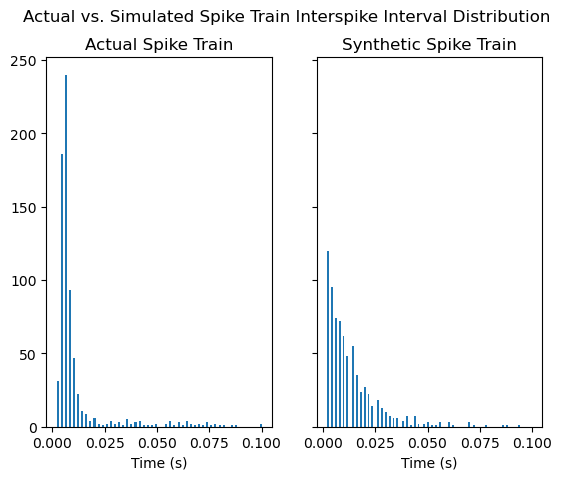

In [158]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
fig.suptitle("Actual vs. Simulated Spike Train Interspike Interval Distribution")

actual_intervals = get_interspike_intervals(actual_spikes)
axs[0].hist(actual_intervals[actual_intervals <0.1], bins = 100)
axs[0].set_title("Actual Spike Train")
axs[0].set_xlabel("Time (s)")

intervals = get_interspike_intervals(spikes)
axs[1].hist(intervals[intervals <0.1], bins = 100)
axs[1].set_title("Synthetic Spike Train")
axs[1].set_xlabel("Time (s)");


The actual spike train data possesses few interspike intervals shorter than 6 ms. This is also due to the refractory period effect which we haven't incorporated into our model.

## Solution 2.6
Finally, we can simply reuse our `coefficient_of_variation` code from the previous chapter's exercises and compare the results. 

In [159]:
def get_coefficient_of_variation(x):
    """
    Calculates the coefficient of variation of an array.

    Parameters
    ----------
    x : array_like
        An array of numbers.
    
    Returns
    -------
    cv : float
        The coefficient of variation.
    """
    
    cv = np.std(x)/np.mean(x)
    return cv

In [160]:
np.sum(rho[:5000])

733

In [161]:
actual_intervals_cv = get_coefficient_of_variation(actual_intervals)
synthetic_intervals_cv = get_coefficient_of_variation(intervals)
print("Coefficient of Variation for Actual Spike Train: {}".format(actual_intervals_cv))
print("Coefficient of Variation for Synthetic Spike Train: {}".format(synthetic_intervals_cv))

Coefficient of Variation for Actual Spike Train: 1.7939405607247219
Coefficient of Variation for Synthetic Spike Train: 0.9798688579528367


The coefficient of variation for our synthetic spike train appears to be significantly larger. This appears to be because there are a number of large interval values which are not present for our synthetic spike trains.

## Exercise 3
The file `c2p3.pickle` contains the responses of a cat LGN cell to two-dimensional visual images. The counts vector in the file records the number of spikes that occured in each 15.6 ms bin, and stim contains the 16x16 images which were present for each corresponding time.
1. Calculate the spike-triggered average images for each of the 12 time steps before each spike and show them all. 
2. By summing up the image values across one spatial dimension produce a figure like that of figure 2.25C.


## Solution 3.1
Firstly, we need to read in the data. 

In [199]:
with open('data/c2p3.pickle', 'rb') as f:
    data = pkl.load(f)
counts = data['counts']
stim = np.transpose(data['stim'], (0, 2, 1))

Our `get_spike_triggered_average` function already works with count data and with multidimensional stimulus, so we may use it without modification. 

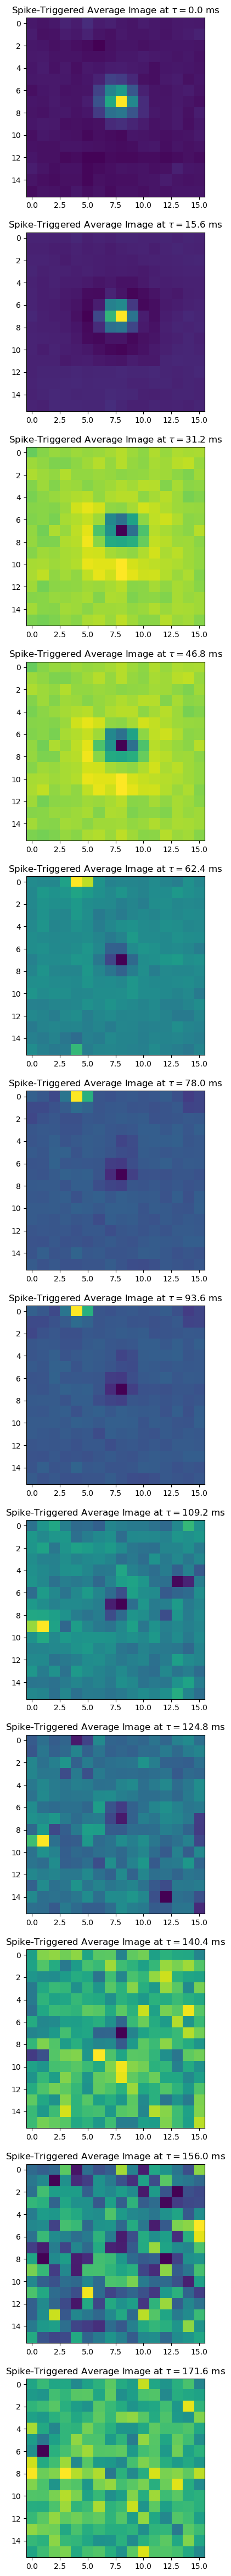

In [240]:
sta_im = np.array([get_spike_triggered_average(counts, stim, len(counts)*0.0156, 0.0156, tau*0.0156, 1) for tau in range(12)])

fig, axs = plt.subplots(12)
fig.set_figheight(60)
for i in range(12):
    axs[i].imshow(sta_im[i])
    axs[i].set_title(r'Spike-Triggered Average Image at $\tau=$' + '{} ms'.format(i*15.6))
    

As expected the spike-triggered images begin with a central receptive field which reverses sign over time. After this it decays into noise, which makes sense as stimulus further back in time is less relevant. 

## Solution 3.2
To generate the plot we can simply sum along the last axis and plot the results.

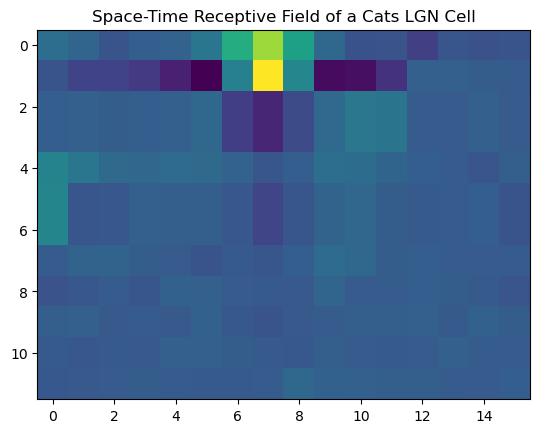

In [251]:
plt.imshow(np.sum(sta_im, axis = 2))
plt.title("Space-Time Receptive Field of a Cats LGN Cell");

## Exercise 4
For a Gaussian random variable $x$ with zero mean and standard deviation $\sigma$, when does $$\left\langle xF(\alpha x)\right\rangle=\alpha \sigma^2 \left\langle F^\prime(\alpha x)\right\rangle$$ where $\alpha$ is constant, $F$ is a differentiable function, $F^\prime$ is its derivative, $$\left\langle xF(\alpha x)\right\rangle=\int\frac{1}{\sqrt(2\pi)\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) xF(\alpha x) dx$$ and $$\left\langle F^\prime(\alpha x)\right\rangle=\int\frac{1}{\sqrt(2\pi)\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) F^\prime(\alpha x) dx.$$

## Solution 4
Given $$\left\langle F^\prime(\alpha x)\right\rangle=\int\frac{1}{\sqrt(2\pi)\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) F^\prime(\alpha x) dx$$ we can integrate by parts using the rule $$\int u\cdot v\ dx=u\int v\ dx-\int u^\prime \left(\int v\ dx\right)\ dx.$$ If we let $v=F^\prime(\alpha x)$ and $u=\frac{1}{\sqrt(2\pi)\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right)$. We can see that $$\int v\ dx = \frac{F(\alpha x)}{\alpha}$$ and $$\frac{d}{dx}u=-\frac{x}{\sigma^2}\frac{1}{\sqrt(2\pi)\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right).$$ We can now use our formula to get $$\left\langle F^\prime(\alpha x)\right\rangle =\frac{1}{\sqrt(2\pi)\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) \frac{F(\alpha x)}{\alpha}+\int\frac{x}{\sigma^2}\frac{1}{\sqrt(2\pi)\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) \frac{F(\alpha x)}{\alpha}\ dx$$ Which we can factorize to get $$\left\langle F^\prime(\alpha x)\right\rangle =\frac{1}{\sqrt(2\pi)\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) \frac{F(\alpha x)}{\alpha}+\frac{1}{\alpha \sigma^2}\left\langle xF(\alpha x)\right\rangle$$ So, the statement holds whenever $$\left[\frac{1}{\sqrt{(2\pi)}\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right) \frac{F(\alpha x)}{\alpha}\right]_{-\infty}^{\ \ \infty}=0.$$ Or equivalently, when there exists some constant $\beta$ such that $$F(x) <\beta \exp\left[\frac{x^2}{2\sigma^2}\right]$$ for all $x\in\mathbb{R}$.

## Exercise 5
Using the inverses if equations 2.15 and 2.17 $$\epsilon = \epsilon_0(\exp(X/\lambda)-1)\text{ and } a=-\frac{180^\degree(\epsilon_0+\epsilon)Y}{\lambda\epsilon\pi}$$ map from cortical coordinates back to visual coordinates and determine what various patterns of activity across the primary visual cortex would "look like". Ermentrout and Cowan (Ermentrout, GB, & Cowan, J (1979) A mathematical theory of visual hallucination patterns. *Biological Cybernetics* **34**:137-150) used these results as a basis of a mathematical theory of visual hallucinations. The figure generated by the program `c2p5.py` shows an llustrative example. This program simulates sine wave activity across the primary visual cortex with a specified frequency and direction, and then maps it back into retinal coordinates to see what visual pattern would be perceived due to this activity. Consider various other patterns of activity and show the visual hallucinations they would generate.

## Solution 5
First we can run the code from the program `c2p5.py` to see the figure.

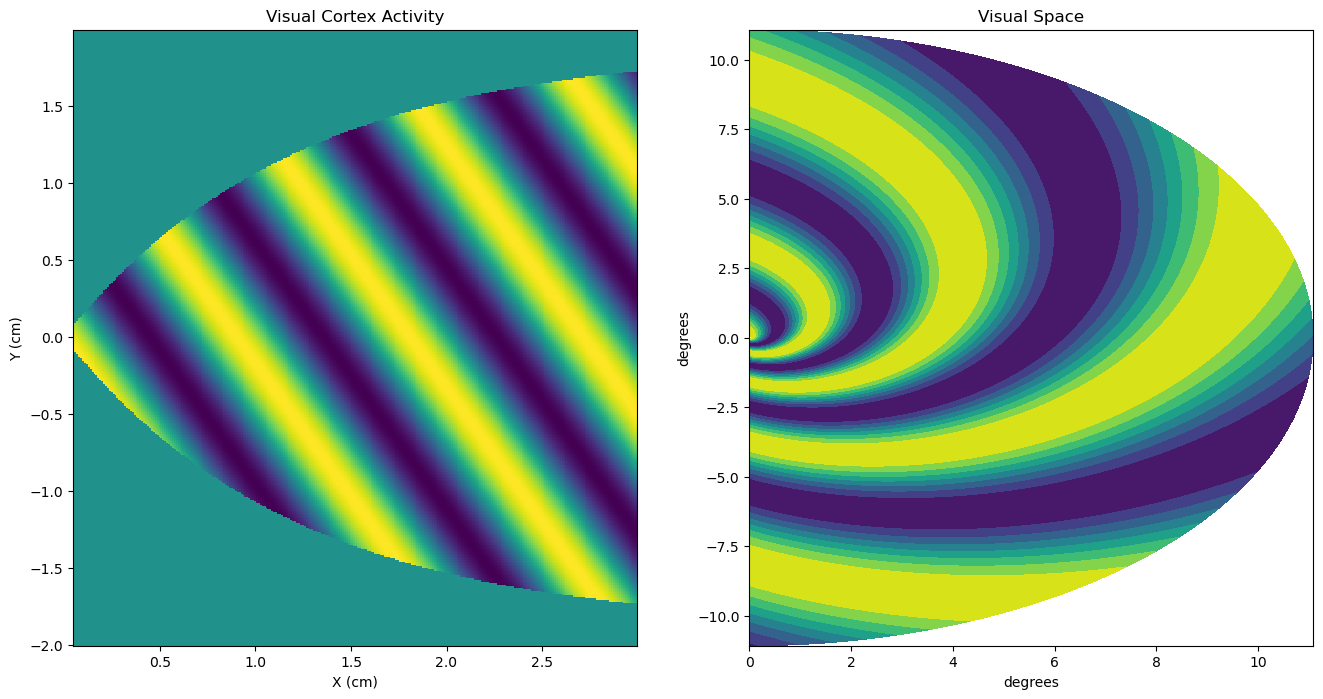

In [59]:
lam=1.2 
ep0=1
X, Y = np.meshgrid(np.arange(0.05, 3, 0.01), np.arange(-2,2, 0.01))

ep=ep0*(np.exp(X/lam)-1)
a=-(180*(ep0+ep)*Y)/(lam*ep*np.pi)                      
a=a*(abs(a)<90)+90*(a>=90) - 90*(a<=-90)

K=8
Theta=np.pi/6
Phi=0
s=np.cos(K*X*np.cos(Theta)+K*Y*np.sin(Theta)-Phi)
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.set_figheight(8)

axs[0].pcolor(X[0,:], Y[:, 0], s*(abs(a) < 90))
axs[0].set_title("Visual Cortex Activity")
axs[0].set_xlabel("X (cm)")
axs[0].set_ylabel("Y (cm)")
axs[1].contourf(ep*np.cos(a*2*np.pi/360),ep*np.sin(a*2*np.pi/360),s)
axs[1].set_title("Visual Space")
axs[1].set_xlabel("degrees")
axs[1].set_ylabel("degrees");

From the output we can see that this kind of sine wave activity across the primary visual cortex is perceived as a spiral pattern. We can now plot some other visual cortext patterns and see how they would be percieved.

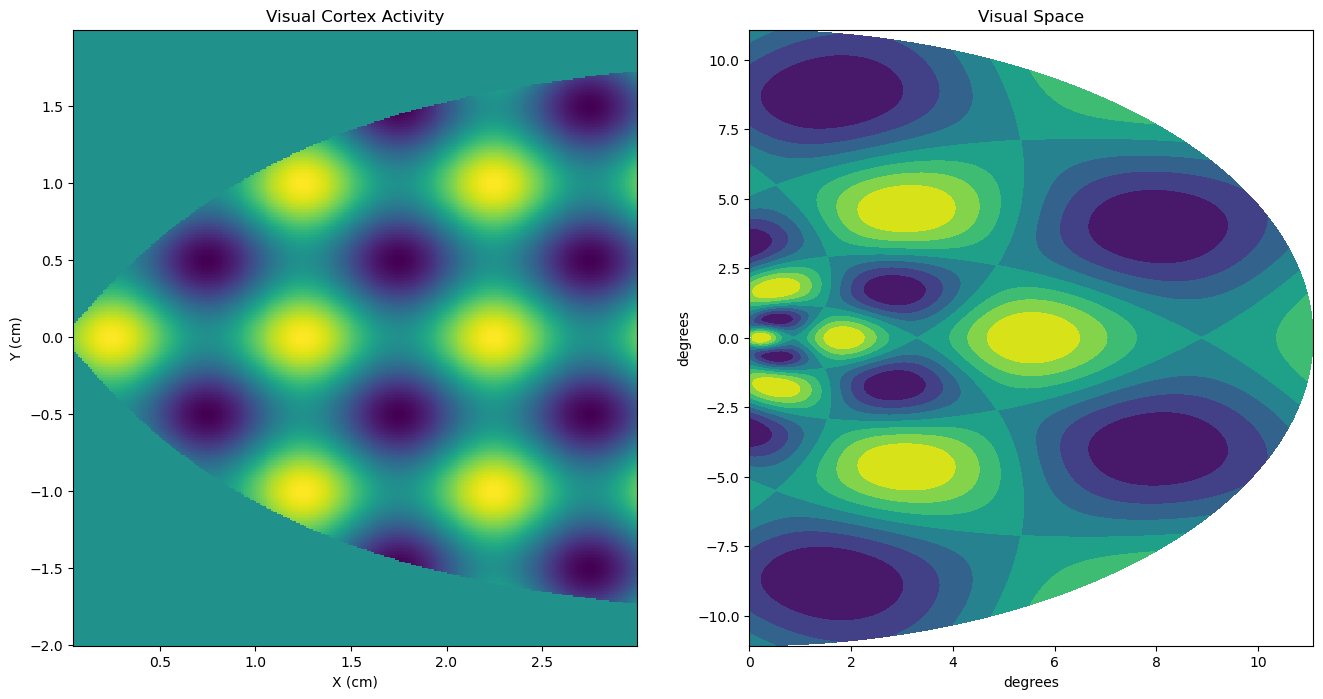

In [69]:
Theta=2*np.pi
s=np.sin(X*Theta) + np.cos(Y*Theta)
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.set_figheight(8)

axs[0].pcolor(X[0,:], Y[:, 0], s*(abs(a) < 90))
axs[0].set_title("Visual Cortex Activity")
axs[0].set_xlabel("X (cm)")
axs[0].set_ylabel("Y (cm)")
axs[1].contourf(ep*np.cos(a*2*np.pi/360),ep*np.sin(a*2*np.pi/360),s)
axs[1].set_title("Visual Space")
axs[1].set_xlabel("degrees")
axs[1].set_ylabel("degrees");

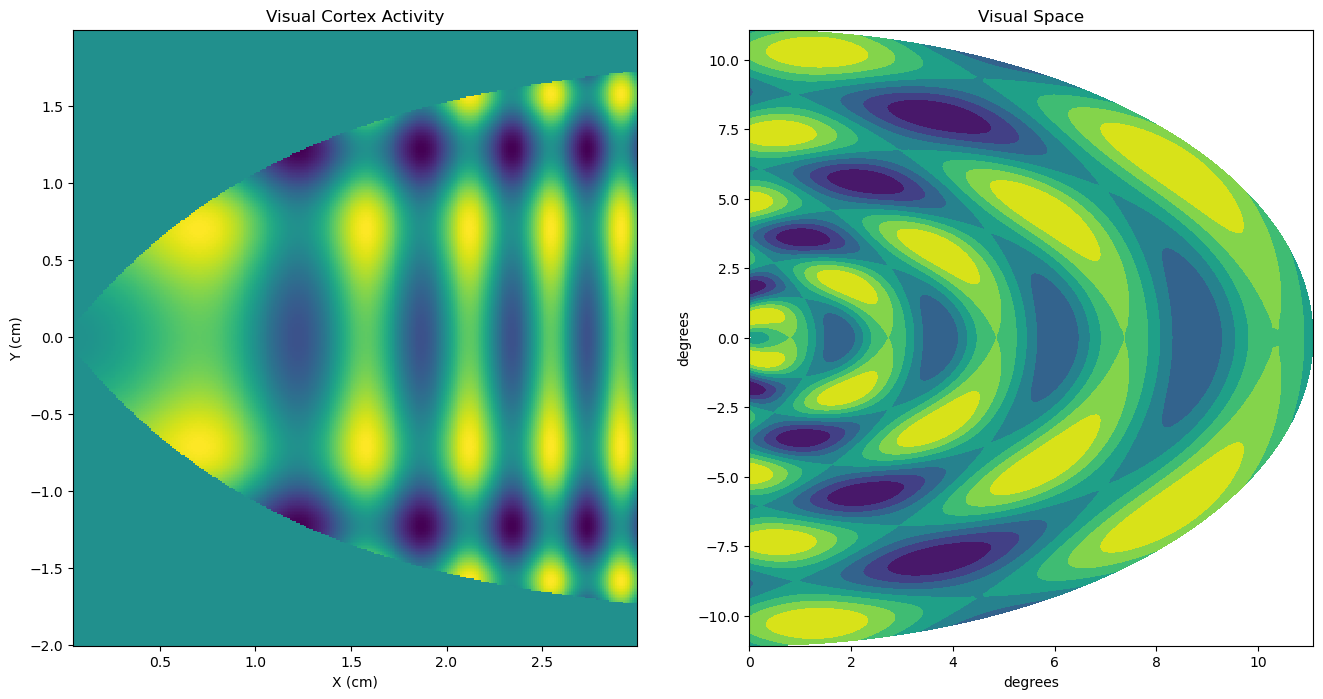

In [99]:
K = np.pi
s = np.sin(K*X**2)+np.sin(K*Y**2)
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.set_figheight(8)

axs[0].pcolor(X[0,:], Y[:, 0], s*(abs(a) < 90))
axs[0].set_title("Visual Cortex Activity")
axs[0].set_xlabel("X (cm)")
axs[0].set_ylabel("Y (cm)")
axs[1].contourf(ep*np.cos(a*2*np.pi/360),ep*np.sin(a*2*np.pi/360),s)
axs[1].set_title("Visual Space")
axs[1].set_xlabel("degrees")
axs[1].set_ylabel("degrees");

## Exercise 6
1. Perform the integral in equation 2.31 for the case $\sigma_x=\sigma_y=\sigma$ to obtain the result $$L_s = \frac{A}{2}\exp\left[-\frac{\sigma^2(k^2+K^2)}{2}\right] (\cos(\phi-\Theta)\exp(\sigma^2kK\cos(\Theta)) +\cos(\phi+\Theta)\exp(-\sigma^2kK\cos(\Theta))). $$ 
2. Perform the integral in equation 2.32 to obtain the result $$L_t(t)=\frac{\alpha^6|\omega|\sqrt{\omega^2+4\alpha^2}}{(\omega^2+\alpha^2)^4}\cos(\omega t - \delta) $$ where $$\delta = 8\arctan\left(\frac{\omega}{\alpha}\right) + \arctan\left(\frac{2\alpha}{\omega} - \pi\right)$$ 
3. From the first result, verify the selectivity curves in figure 2.15. 
4. From the second result, verify the selectivity curve in figure 2.16. 
5. Plot $\delta$ as a function of $\omega$.

## Solution 6.1
Equation 2.31 states that $$L_s = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} D_s(x,y)A\cos(Kx\cos(\Theta) + Ky\sin(\Theta) - \phi) dx\  dy$$ where $D_s$ is a Gabor function defined by $$D_s(x,y)=\frac{1}{2\pi\sigma_x\sigma_y} \exp\left(-\frac{x^2}{2\sigma_x^2}-\frac{y^2}{2\sigma_y^2}\right)\cos(kx-\phi).$$ And since we're dealing with the case $\sigma_x=\sigma_y=\sigma$ we may rewrite this as $$D_s(x,y)=\frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)\cos(kx-\phi) $$ we can observe that $$\cos\left(kx-\phi\right)\cos\left(Kx\cos\left(\Theta\right)+Ky\sin\left(\Theta\right)-\Phi\right) $$ can be expressed as $$\frac{\cos\left(kx-\phi+Kx\cos\left(\Theta\right)+Ky\sin\left(\Theta\right)-\Phi\right)}{2}+\frac{\cos\left(kx-\phi-Kx\cos\left(\Theta\right)-Ky\sin\left(\Theta\right)+\Phi\right)}{2}$$ Or equivalently $$ \frac{\cos\left(x\left(k+K\cos\left(\Theta\right)\right)+y\left(K\sin\left(\Theta\right)\right)-\left(\phi+\Phi\right)\right)}{2}+\frac{\cos\left(x\left(k-K\cos\left(\Theta\right)\right)-y\left(K\sin\left(\Theta\right)\right)-\left(\phi-\Phi\right)\right)}{2}$$ Which means we have $$ L_{s}=	\frac{A}{4\pi\sigma^{2}}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\exp\left[-\frac{x^{2}+y^{2}}{2\sigma^{2}}\right]\cos\left(xB+yC-D\right)\ dx\ dy
	+\frac{A}{4\pi\sigma^{2}}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\exp\left[-\frac{x^{2}+y^{2}}{2\sigma^{2}}\right]\cos\left(xE+yF+G\right)\ dx\ dy$$ where 
\begin{align*} 
B&=	k+K\cos\left(\Theta\right)\\
C&=	K\sin\left(\Theta\right)\\
D&=	\phi+\Phi\\
E&=	k-K\cos\left(\Theta\right)\\
F&=	K\sin\left(\Theta\right)\\
G&=	\phi-\Phi\\
\end{align*}

Since both integrals are of the same form we can solve one and then make the appropriate substitions for the other. We can solve the integral by refactoring the first term as $$\frac{A}{4\pi\sigma^{2}}\int_{-\infty}^{\infty}\exp\left[-\frac{y^{2}}{2\sigma^{2}}\right]\int_{-\infty}^{\infty}\exp\left[-\frac{x^{2}}{2\sigma^{2}}\right]\cos\left(xB+yC-D\right)\ dx\ dy$$ which we can then apply Cauchy's Integral theorem to the inner integrand to get $$\left|\sigma\right|\sqrt{2\pi}\frac{A}{4\pi\sigma^{2}}\exp\left[-\frac{B^{2}\sigma^{2}}{2}\right]\int_{-\infty}^{\infty}\exp\left[-\frac{y^{2}}{2\sigma^{2}}\right]\cos\left(yC-D\right)\ dy$$ Reapplying Cauchy's integral theorem to the result then yields $$\frac{A}{2}\exp\left[-\frac{B^{2}\sigma^{2}}{2}\right]\exp\left[-\frac{C^{2}\sigma^{2}}{2}\right]\cos\left(D\right).$$ Or equivalently $$\frac{A}{2}\exp\left[-\frac{\left(B^{2}+C^{2}\right)\sigma^{2}}{2}\right]\cos\left(D\right).$$ Substituting our values for $B,C$ and $D$ then gives $$\frac{A}{2}\exp\left[-\frac{\left(\left(k+K\cos\left(\Theta\right)\right)^{2}+\left(K\sin\left(\Theta\right)\right)^{2}\right)\sigma^{2}}{2}\right]\cos\left(\phi+\Phi\right).$$ Multiplying out the result and refactoring yields $$\frac{A}{2}\exp\left[-\frac{\left(k^{2}+K^{2}\right)\sigma^{2}}{2}\right]\exp\left[2kK\sigma^{2}\cos\left(\theta\right)\right]\cos\left(\phi+\Phi\right).$$ Substitution our values for E,F and G then gives $$\frac{A}{2}\exp\left[-\frac{\left(k-K\cos\left(\Theta\right)^{2}+\left(K\sin\left(\Theta\right)\right)^{2}\right)\sigma^{2}}{2}\right]\cos\left(\phi-\Phi\right).$$ Again multiplying out the result and refactoring then gives $$\frac{A}{2}\exp\left[-\frac{\left(k^{2}+K^{2}\right)\sigma^{2}}{2}\right]\exp\left[-2kK\sigma^{2}\cos\left(\theta\right)\right]\cos\left(\phi-\Phi\right).$$ Combining both terms then results in $$L_{s}=\frac{A}{2}\exp\left[-\frac{\left(k^{2}+K^{2}\right)\sigma^{2}}{2}\right]\left(\exp\left[2kK\sigma^{2}\cos\left(\theta\right)\right]\cos\left(\phi+\Phi\right)+\exp\left[-2kK\sigma^{2}\cos\left(\theta\right)\right]\cos\left(\phi-\Phi\right)\right)$$

as required.



## Solution 6.2


## Solution 6.3
The three selectivity curves in figures 2.15 plot the selectivity of a Gabor filter acting on a cosine grating as a function of $\Theta$, $K/k$ and $\Phi$ respectively. To reproduce these plots we can implement the solution to the integrals and then plot the results.

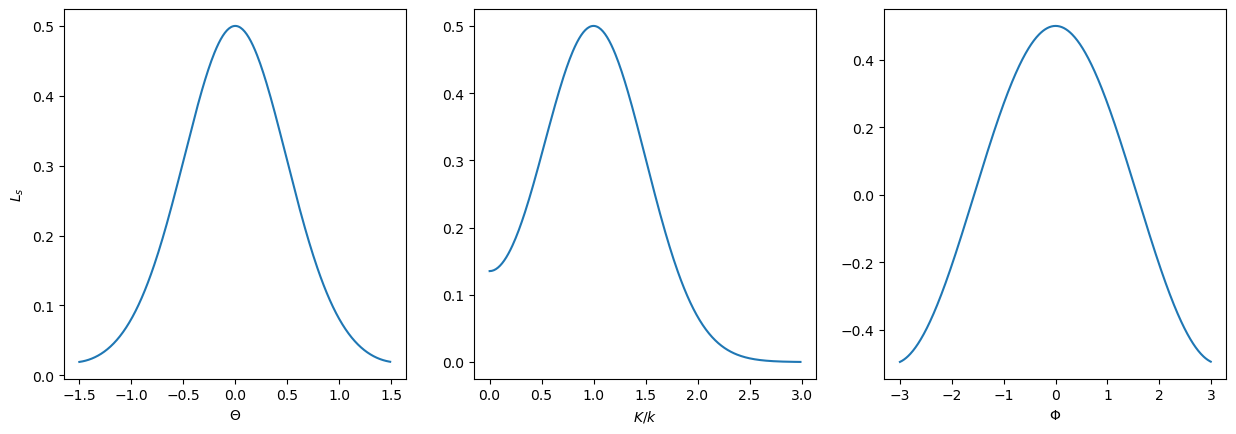

In [16]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(15)

phi=0
k=np.pi
sigma = 2/k
A=1

Thetas = np.arange(-1.5,1.5,0.01)
K=k
Phi=0

ls = A/2 * np.exp(-sigma**2*(k**2+K**2)/2) * \
     (np.cos(phi-Phi) * np.exp(sigma**2*k*K*np.cos(Thetas)) + \
      np.cos(phi+Phi)*np.exp(-sigma**2*k*K*np.cos(Thetas)))
axs[0].plot(Thetas, ls)
axs[0].set_xlabel(r'$\Theta$')
axs[0].set_ylabel(r'$L_s$')

Ks = np.arange(0, 3, 0.01)*k
Theta = 0
Phi = 0
ls = A/2 * np.exp(-sigma**2*(k**2+Ks**2)/2) * \
     (np.cos(phi-Phi) * np.exp(sigma**2*k*Ks*np.cos(Theta)) + \
      np.cos(phi+Phi)*np.exp(-sigma**2*k*Ks*np.cos(Theta)))
axs[1].plot(Ks/k, ls)
axs[1].set_xlabel(r'$K/k$')

Phis = np.arange(-3, 3, 0.01)
Theta = 0
K=k
ls = A/2 * np.exp(-sigma**2*(k**2+K**2)/2) * \
      (np.cos(phi-Phis) * np.exp(sigma**2*k*K*np.cos(Theta)) + \
       np.cos(phi+Phis)*np.exp(-sigma**2*k*K*np.cos(Theta)))
axs[2].plot(Phis, ls)
axs[2].set_xlabel(r'$\Phi$');

Since these plots are identical to those in figure 2.15 we have verified the selectivity curves. 

## Solution 6.4
Figure 2.16 plots the amplitude of the temporal component in response to a counterphase grating as a function of the temporal oscilation frequency $\omega/2\pi$. We can observe that the part of our equation that represents the amplitude is given  by $$\frac{\alpha^6|\omega|\sqrt{\omega^2+4\alpha^2}}{(\omega^2+\alpha^2)^4}. $$ Therefore we can just plot this term as a function of $\omega/2\pi$.

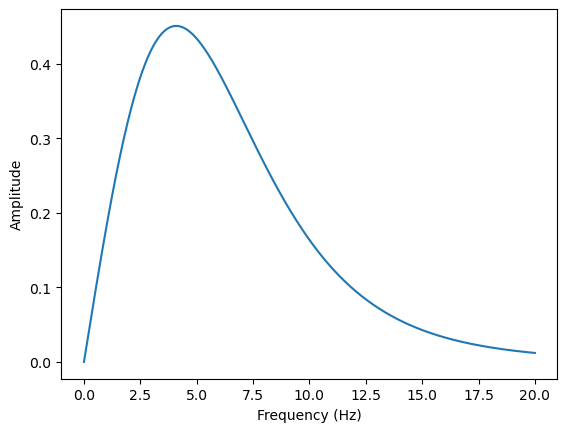

In [18]:
alpha = 1/0.015
omegas = np.arange(0, 20*2*np.pi, 0.01)
lt =  alpha**6*np.abs(omegas)*np.sqrt(omegas**2 + 4*alpha**2)/((omegas**2+alpha**2)**4)

plt.plot(omegas/(2*np.pi), lt)
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)");


Which verifies selectivity curve in figure 2.16.  

## Solution 6.5
As in the previous two parts we can simply implement the equation given and plot the results.

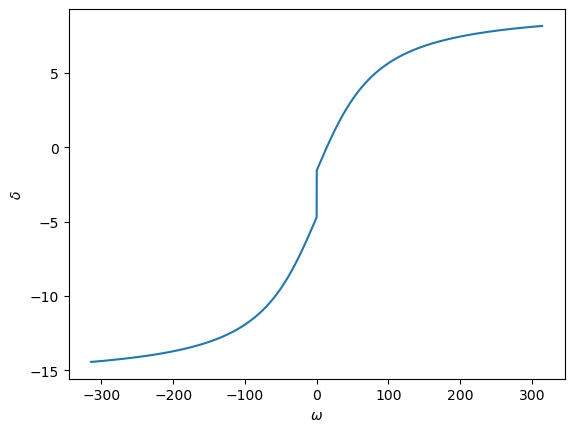

In [26]:
alpha = 1/0.015
omegas = np.arange(-100*np.pi, 100*np.pi, 0.01)
delta = 8*np.arctan(omegas/alpha)+np.arctan(2*alpha/omegas)-np.pi

plt.plot(omegas, delta)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\delta$');

## Exercise 7 
Numerically compute the spatial part of the linear response of a simple cell with a separable space-time receptive field to a sinusoidal grating, as given by equation 2.31. By 
    - Using a stimulus oriented with $\Theta = 0$. 
    - For the spatial receptive field kernel, using equation 2.27 with $\sigma_x = \sigma_y = 1\degree$, $\phi = 0$, and $1/k = 0.5\degree$ . 
1. Plot $L_s$ as a function of $K$ taking $\Phi = 0$ and $A = 50$. This determines the spatial frequency selectivity of the cell. What is its preferred spatial frequency? 
2. Plot $L_s$ as a function of $\Phi$ taking $1/K = 0.5\degree$ and $A = 50$. This determines the spatial phase selectivity of the cell. What is its preferred spatial phase?


## Solution 7.1
The first steps are to implement the sinusoidal grating and the gabor filter as described by the relevant equations.

In [67]:
def get_sinusoidal_grating(x, y, A, K, Theta, Phi):
    """
    Calculates the value(s) of a sinusoidal grating at a point or over a grid.

    Parameters
    ----------
    x : {float, array_like}
        The x coordinate(s) of the point(s) to evaluate.
    y : {float, array_like}
        The y coordinate(s) of the point(s) to evaluate.
    sx : float
        The standard deviation of the filter along the x axis.
    sy : float
        The standard deviation of the filter along the y axis.
    K : float
        The preferred spatial frequency of the filter.
    Phi : float
        The preferred spatial phase of the filter.

    Returns
    -------
    grating : float 
        The value(s) of the sinusoidal grating.
    """

    grating = A*np.cos(K*x*np.cos(Theta)+K*y*np.sin(Theta) - Phi)
    return grating

In [17]:
def gabor_filter(x, y, sx, sy, k, phi):
    """
    Calculates the value of a Gabor filter at a point.

    Parameters
    ----------
    x : {float, array_like}
        The x coordinate(s) of the point(s) to evaluate.
    y : {float, array_like}
        The y coordinate(s) of the point(s) to evaluate.
    sx : float
        The standard deviation of the filter along the x axis.
    sy : float
        The standard deviation of the filter along the y axis.
    k : float
        The preferred spatial frequency of the filter.
    phi : float
        The preferred spatial phase of the filter.

    Returns
    -------
    ds : float 
        The value of the gabor filter at the point (x,y).
    """

    ds = (1/(2*np.pi*sx*sy)) * np.exp(-(x**2)/(2*sx**2)-(y**2)/(2*sy**2))*np.cos(k*x-phi)
    return ds

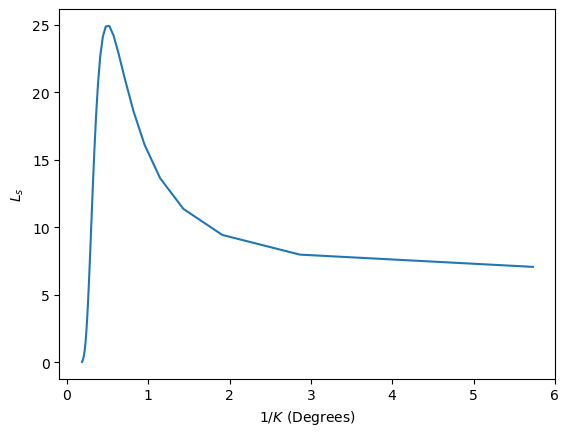

In [69]:
dx, dy = 0.01, 0.01
x = np.arange(-3*np.pi, 3*np.pi, dx)
y = np.arange(-3*np.pi, 3*np.pi, dy)
xs, ys = np.meshgrid(x,y)

Theta = 0
sigma = np.pi/180
phi = 0
k = 360/np.pi

Phi = 0
A = 50
Ks = np.arange(0.1, np.pi, 0.1)*100

lss = []
for K in Ks:
    ds = gabor_filter(xs, ys, sigma, sigma, k, phi)
    grating = get_sinusoidal_grating(xs, ys, A, K, Theta, Phi)
    lss.append(np.sum(ds*grating)*dx*dy)
plt.plot((1/Ks)*(180/np.pi), lss)
plt.xlabel(r'$1/K$ (Degrees)')
plt.ylabel(r'$L_s$');

To determine the value of $1/K$ that results in the largest value we can do the following

In [50]:
print(1/Ks[np.argmax(lss)] * 180/np.pi)

0.520870722846203


So as expected the preferred spatial frequency is given by $1/K$=$1/k=0.5\degree$ 


## Solution 7.2
An identical approach will allow us to determine the preferred spatial phase selectivity of the cell, except this time we vary $\Phi$.

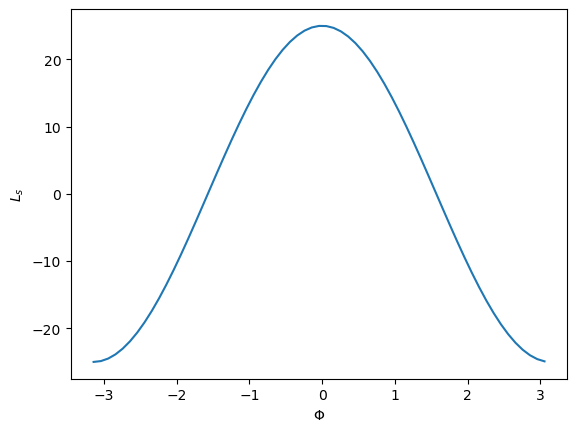

In [53]:
dx, dy = 0.01, 0.01
x = np.arange(-3*np.pi, 3*np.pi, dx)
y = np.arange(-3*np.pi, 3*np.pi, dy)
xs, ys = np.meshgrid(x,y)

Theta = 0
sigma = np.pi/180
phi = 0
k = 360/np.pi

A = 50
K = 360/np.pi
Phis = np.arange(-np.pi, np.pi, 0.1)

lss = []
for Phi in Phis:
    ds = gabor_filter(xs, ys, sigma, sigma, k, phi)
    grating = get_sinusoidal_grating(xs, ys, A, K, Theta, Phi)
    lss.append(np.sum(ds*grating)*dx*dy)
plt.plot(Phis, lss)
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$L_s$');

Again, as expected the preferred spatial phase of the cell is $\Phi=\phi=0$.

## Exercise 8
Consider a complex cell with the spatial part of its response given by $L_1^2 + L_2^2$, where $L_1$ and $L_2$ are linear responses determined by equation 2.31 with kernels given by equation 2.27 with $\sigma_x = \sigma_y = 1\degree$ , and $1/k = 0.5\degree$, and with $\phi = 0$ for $L_1$ and $\phi=-\pi/2$ for $L_2$. 
1. Using a stimulus oriented with $\Theta = 0$, compute and plot $L_1^2 + L_2^2$ as a function of $K$ taking $\Phi = 0$ and $A = 5$. This determines the spatial frequency selectivity of the cell.
2. Compute and plot $L_1^2 + L_2^2$ as a function of $\Phi$ taking
$1/K = 0.5\degree$ and $A = 5$. This determines the spatial phase selectivity of the cell. Does the spatial phase selectivity match what you expect for a complex cell?

## Solution 8.1
As in the previous exercise we can implement the linear responses as required. However, this time we will implement two differen linear responses, square the results and then sum them.

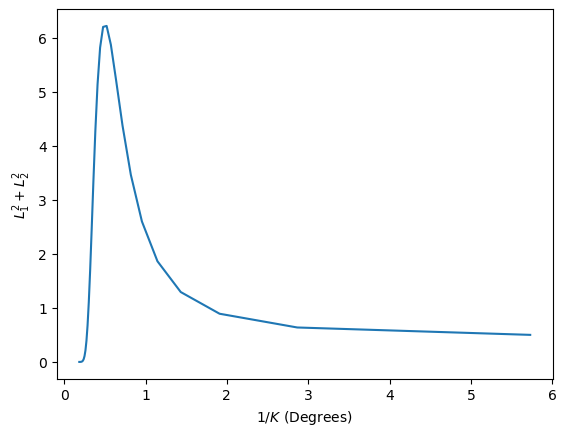

In [71]:
dx, dy = 0.01, 0.01
x = np.arange(-3*np.pi, 3*np.pi, dx)
y = np.arange(-3*np.pi, 3*np.pi, dy)
xs, ys = np.meshgrid(x,y)

Theta = 0
sigma = np.pi/180
k = 360/np.pi

Phi = 0
A = 5
Ks = np.arange(0.1, np.pi, 0.1)*100

l1s = []
l2s = []
for K in Ks:
    ds1 = gabor_filter(xs, ys, sigma, sigma, k, 0)
    ds2 = gabor_filter(xs, ys, sigma, sigma, k, -np.pi/2)
    grating = get_sinusoidal_grating(xs, ys, A, K, Theta, Phi)
    l1s.append(np.sum(ds1*grating)*dx*dy)
    l2s.append(np.sum(ds2*grating)*dx*dy)

    
plt.plot((1/Ks)*(180/np.pi), np.array(l1s)**2 + np.array(l2s)**2)
plt.xlabel(r'$1/K$ (Degrees)')
plt.ylabel(r'$L_1^2+L_2^2$');

## Solution 8.2
And an identical approach will allow us to plot $L_1^2+L_2^2$ as a function of $\Phi$.

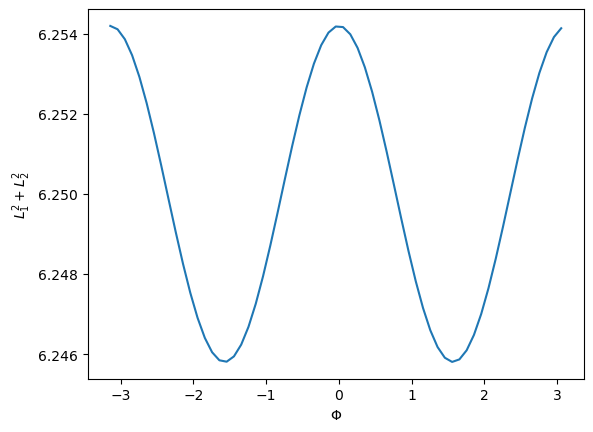

In [15]:
dx, dy = 0.01, 0.01
x = np.arange(-3*np.pi, 3*np.pi, dx)
y = np.arange(-3*np.pi, 3*np.pi, dy)
xs, ys = np.meshgrid(x,y)

Theta = 0
sigma = np.pi/180
k = 360/np.pi

K = 360/np.pi
A = 5
Phis = np.arange(-np.pi, np.pi, 0.1)

l1s = []
l2s = []
for Phi in Phis:
    ds1 = gabor_filter(xs, ys, sigma, sigma, k, 0)
    ds2 = gabor_filter(xs, ys, sigma, sigma, k, -np.pi/2)
    grating = get_sinusoidal_grating(xs, ys, A, K, Theta, Phi)
    l1s.append(np.sum(ds1*grating)*dx*dy)
    l2s.append(np.sum(ds2*grating)*dx*dy)

plt.plot(Phis, np.array(l1s)**2 + np.array(l2s)**2)
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$L_1^2+L_2^2$');

This matches our expectation of the response of a complex cell since the plot shows that the response of the cell varies only slighly to changes in the spatial phase. 

## Exercise 9
Consider the linear temporal response for a simple or complex cell given by equation 2.32 with a temporal kernel given by equation 2.29
with $1/\alpha = 15$ ms. 
1. Compute and plot $L_t(t)$ for $\omega = 6\pi/s$. This
determines the temporal response of the simple cell. Do not plot the
negative part of Lt(t) because the cell cannot fire at a negative rate.
2. Compute and plot $L_t^2(t)$ for $\omega= 6\pi/s$. This determines the temporal response of a complex cell. What are the differences between the temporal responses of the simple and complex cells?

## Solution 9.1
We can plot the function ad described by implementing a two-phase temporal kernel function as described.

In [4]:
def get_two_phase_temporal_kernel(alpha, t):
    """
    Calculates the two-phase temporal kernel at time t.

    Parameters
    ----------
    alpha : float
        A parameter which controls the temporal development of the kernel.
    t : float
        The time point(s) to calculate the kernel value at.

    Returns
    -------
    dt : float
        The value of the temporal kernel at time t. 
    """

    dt = alpha * np.exp(-alpha*t) *\
         (((alpha*t)**5)/np.math.factorial(5) - ((alpha*t)**7)/np.math.factorial(7))
    return dt

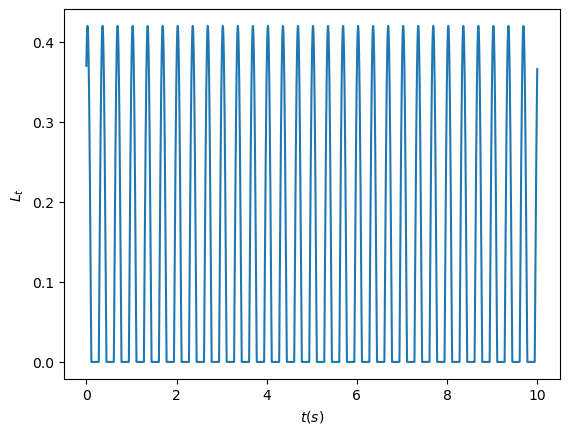

In [8]:
ts = np.arange(0, 10, 0.001)
taus = np.arange(0, 10, 0.001)

alpha = 1/0.015
omega = 6*np.pi
lts = []
for t in ts:
    dt = get_two_phase_temporal_kernel(alpha, taus)
    grating = np.cos(omega*(t-taus))

    lts.append(np.sum(dt*grating)*0.001)

lts = np.array(lts)
plt.plot(ts, np.where(lts > 0, lts, 0))
plt.xlabel(r'$t (s)$')
plt.ylabel(r'$L_t$');

## Solution 9.2
We can then use an identical approach and square the output to get the following.

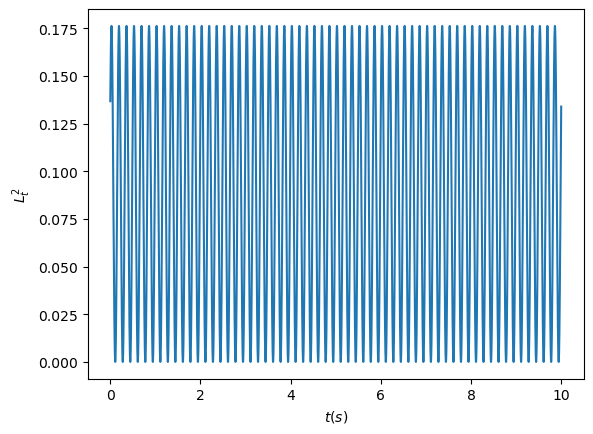

In [9]:
ts = np.arange(0, 10, 0.001)
taus = np.arange(0, 10, 0.001)

alpha = 1/0.015
omega = 6*np.pi
lts = []
for t in ts:
    dt = get_two_phase_temporal_kernel(alpha, taus)
    grating = np.cos(omega*(t-taus))

    lts.append(np.sum(dt*grating)*0.001)

plt.plot(ts, np.array(lts)**2)
plt.xlabel(r'$t (s)$')
plt.ylabel(r'$L_t^2$');

As expected the primary difference between the two plots is that the squared response has a frequency twice as high as the half-weave rectified response. Additionally, the amplitude of the response is squared compared to that of the linear response.

## Exercise 10
Compute the response of a model simple cell with a separable space-time receptive field to the moving grating $$s(x,y,t) = \cos(Kx-\omega t)$$ For $D_s$, use equation 2.27 with $\sigma_x = \sigma_y = 1\degree$ , $\phi = 0$, and $1/k = 0.5\degree$. For $D_t$, use equation 2.29 with $1/\alpha = 15$ ms. Compute the linear estimate of the response given by equation 2.24 and assume that the actual response is proportional to a rectified version of this linear response estimate. 
1. Plot the response as a function of time for $1/K = 1/k = 0.5\degree$ and $\omega = 8\pi/s$. 
2. Plot the response amplitude as a function of $\omega$ for
$1/K = 1/k = 0.5\degree$. 
3. Plot the response as a function of K for $\omega =8\pi/s$. 

## Solution 10.1
To evaluate the simple cell responses as described we can calculate the temporal and spatial components using $$D_s(x,y)=\frac{1}{2\pi\sigma_x\sigma_y}\exp\left[-\frac{x^2}{2\sigma_x^2}-\frac{y^2}{2\sigma_y^2}\right]\cos(kx-\phi)$$ and $$D_t(t)=\alpha\exp\left[-\alpha t\right]\left(\frac{(\alpha t)^5}{5!}-\frac{(\alpha t)^7}{7!}\right)$$

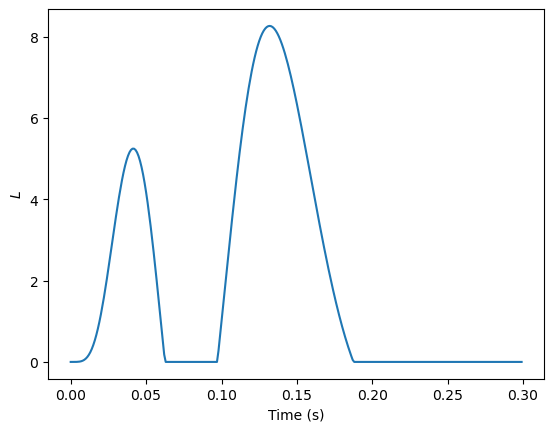

In [27]:
dx = 0.001
dy = 0.001
x = np.arange(-np.pi/32, np.pi/32, dx)
y = np.zeros(len(x))

dt = 0.001
t = np.arange(0,0.3,dt)

xs, ys, ts = np.meshgrid(x, y, t, indexing='ij')

sigma = np.pi/180
K = 360/np.pi
k = 360/np.pi
w = 8*np.pi
alpha = 1/0.015

gratings = np.cos(K*xs-w*ts)
ds = gabor_filter(xs, ys, sigma, sigma, k, 0)
dt = get_two_phase_temporal_kernel(alpha, ts)
l = np.sum(ds*gratings*dt, axis=(0,1))*(dx*dy)
l = np.where(l<0, 0, l)

plt.plot(t, l)
plt.xlabel(r'Time (s)')
plt.ylabel(r'$L$');

## Solution 10.2
Similarly, to find the response amplitude as a function of $\omega$ we can calculate the responses for each value of $\omega$, and then take the magnitude of the response.

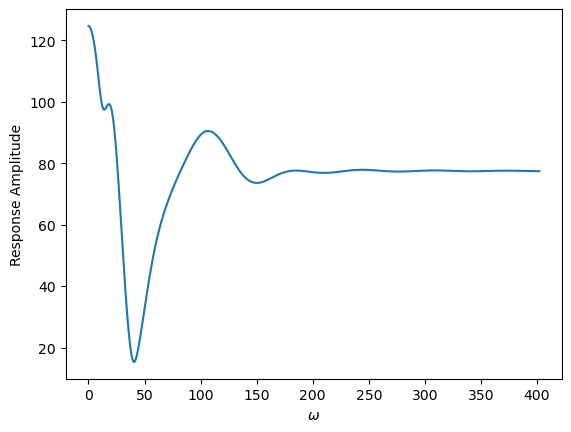

In [45]:
dx = 0.01
dy = 0.01
x = np.arange(-np.pi/32, np.pi/32, dx)
y = np.zeros(len(x))

dt = 0.0005
t = np.arange(0,0.3,dt)

dw = 0.01
w = np.arange(0, 128*np.pi)

xs, ys, ts, ws = np.meshgrid(x, y, t, w, indexing='ij')

sigma = np.pi/180
K = 360/np.pi
k = 360/np.pi
alpha = 1/0.015

gratings = np.cos(K*xs-ws*ts)
ds = gabor_filter(xs, ys, sigma, sigma, k, 0)
dt = get_two_phase_temporal_kernel(alpha, ts)
l = np.sum(ds*gratings*dt, axis=(0,1))*(dx*dy)
l = np.where(l<0, 0, l)
response_amplitudes = [np.sqrt(np.dot(l[:,i], l[:,i])) for i in range(len(w))]

plt.plot(w, response_amplitudes)
plt.xlabel(r'$\omega$')
plt.ylabel(r'Response Amplitude');

## Solution 10.3
An identical approach will also yield the response amplitude as a function of $K$.

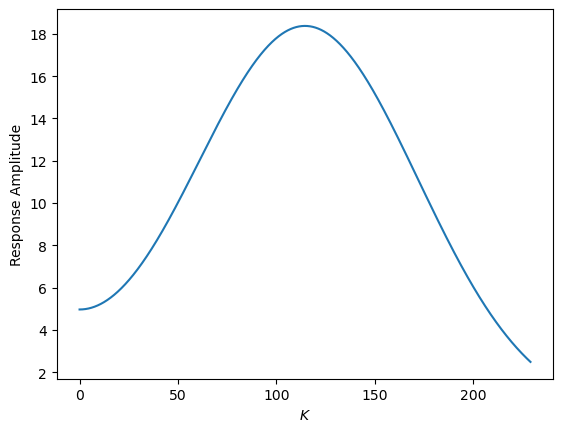

In [25]:
dx = 0.01
dy = 0.01
x = np.arange(-np.pi/32, np.pi/32, dx)
y = np.zeros(len(x))

dt = 0.01
t = np.arange(0,0.3,dt)

dK = 0.1
K = np.arange(0, 720/np.pi, dK)

xs, ys, ts, Ks = np.meshgrid(x, y, t, K, indexing='ij')

sigma = np.pi/180
w = 8*np.pi
k = 360/np.pi
alpha = 1/0.015

gratings = np.cos(Ks*xs-w*ts-ys)
ds = gabor_filter(xs, ys, sigma, sigma, k, 0)
dt = get_two_phase_temporal_kernel(alpha, ts)
l = np.sum(ds*gratings*dt, axis=(0,1))*(dx*dy)
l = np.where(l<0, 0, l)
response_amplitudes = [np.sqrt(np.dot(l[:,i], l[:,i])) for i in range(len(K))]

plt.plot(K, response_amplitudes)
plt.xlabel(r'$K$')
plt.ylabel(r'Response Amplitude');

## Exercise 11
Compute the response of a model complex cell  to the moving grating $$s(x,y,t) = \cos(Kx-\omega t).$$ The complex cell should be modeled by squaring and adding the unrectified linear response estimate of two simple cells with spatial receptive fields given by equation 2.27 with $\sigma_x=\sigma_y=1\degree$, and $1/k=0.5\degree$. The cells should have spatial phase preference given by $\phi=0$ and $\phi=-\frac{\pi}{2}$. The linear responses should be calculated using equation 2.24, with the temporal kernel described in equation 2.29, where $\alpha=1/15$ ms. 

1. Plot the complex cell response as a function of time for $1/K = 1/k = 0.5\degree$ and $\omega = 8\pi/s$. 
2. Plot the response amplitude as a function of $\omega$ for
$1/K = 1/k = 0.5\degree$. 
3. Plot the response as a function of K for $\omega =8\pi/s$. 

## Solution 11.1
We can plot the complex cell response as a function of time using a similar process to the previous exercise. However, this time we create two different linear responses, square them and take their sum.

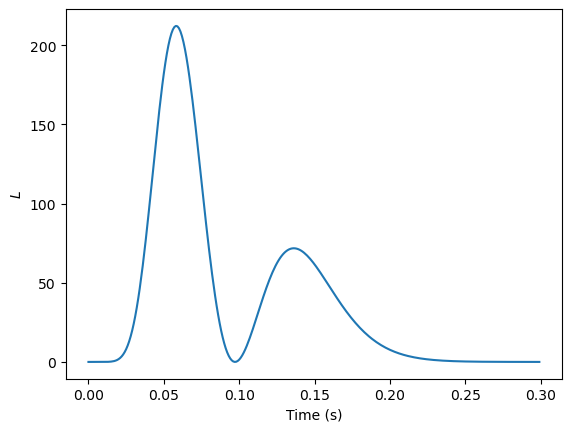

In [46]:
dx = 0.001
dy = 0.001
x = np.arange(-np.pi/32, np.pi/32, dx)
y = np.arange(-np.pi/32, np.pi/32, dy)

dt = 0.001
t = np.arange(0,0.3,dt)

xs, ys, ts = np.meshgrid(x, y, t, indexing='ij')

sigma = np.pi/180
K = 360/np.pi
k = 360/np.pi
w = 8*np.pi
alpha = 1/0.015

gratings = np.cos(K*xs-w*ts)
ds1 = gabor_filter(xs, ys, sigma, sigma, k, 0)
ds2 = gabor_filter(xs, ys, sigma, sigma, k, -np.pi/2)
dt = get_two_phase_temporal_kernel(alpha, ts)
l1 = np.sum(ds1*gratings*dt, axis=(0,1))*(dx*dy)
l2 = np.sum(ds2*gratings*dt, axis=(0,1))*(dx*dy)
l = l1**2 + l2**2

plt.plot(t, l)
plt.xlabel(r'Time (s)')
plt.ylabel(r'$L$');

## Solution 11.2
Again, an identiacal approach to the previous part will yield the appropriate plot.

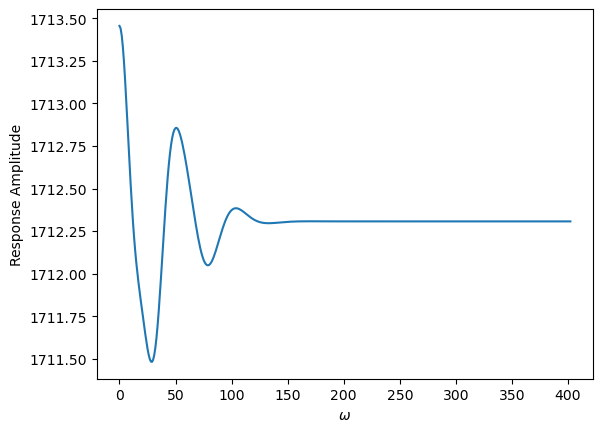

In [47]:
dx = 0.01
dy = 0.01
x = np.arange(-np.pi/32, np.pi/32, dx)
y = np.arange(-np.pi/32, np.pi/32, dy)

dt = 0.0005
t = np.arange(0,0.3,dt)

dw = 0.01
w = np.arange(0, 128*np.pi)

xs, ys, ts, ws = np.meshgrid(x, y, t, w, indexing='ij')

sigma = np.pi/180
K = 360/np.pi
k = 360/np.pi
alpha = 1/0.015

gratings = np.cos(K*xs-ws*ts)
ds1 = gabor_filter(xs, ys, sigma, sigma, k, 0)
ds2 = gabor_filter(xs, ys, sigma, sigma, k, -np.pi/2)
dt = get_two_phase_temporal_kernel(alpha, ts)
l1 = np.sum(ds1*gratings*dt, axis=(0,1))*(dx*dy)
l2 = np.sum(ds2*gratings*dt, axis=(0,1))*(dx*dy)
l = l1**2 + l2**2

response_amplitudes = [np.sqrt(np.dot(l[:,i], l[:,i])) for i in range(len(w))]

plt.plot(w, response_amplitudes)
plt.xlabel(r'$\omega$')
plt.ylabel(r'Response Amplitude');

## Solution 11.3
Finally, we can plot the response amplitude as a function of $K$. 

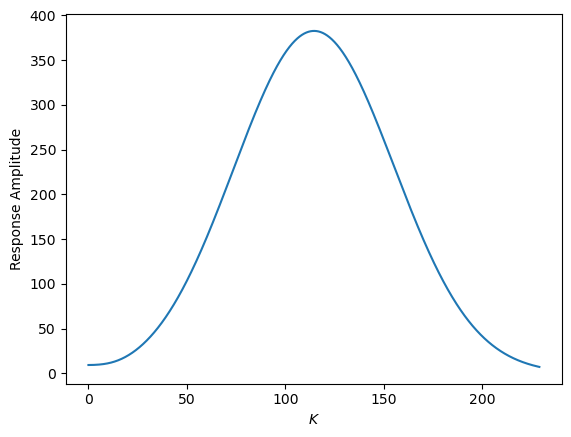

In [48]:
dx = 0.01
dy = 0.01
x = np.arange(-np.pi/32, np.pi/32, dx)
y = np.arange(-np.pi/32, np.pi/32, dy)

dt = 0.01
t = np.arange(0,0.3,dt)

dK = 0.1
K = np.arange(0, 720/np.pi, dK)

xs, ys, ts, Ks = np.meshgrid(x, y, t, K, indexing='ij')

sigma = np.pi/180
w = 8*np.pi
k = 360/np.pi
alpha = 1/0.015

gratings = np.cos(Ks*xs-w*ts-ys)
ds1 = gabor_filter(xs, ys, sigma, sigma, k, 0)
ds2 = gabor_filter(xs, ys, sigma, sigma, k, -np.pi/2)
dt = get_two_phase_temporal_kernel(alpha, ts)
l1 = np.sum(ds1*gratings*dt, axis=(0,1))*(dx*dy)
l2 = np.sum(ds2*gratings*dt, axis=(0,1))*(dx*dy)
l = l1**2 + l2**2

response_amplitudes = [np.sqrt(np.dot(l[:,i], l[:,i])) for i in range(len(K))]

plt.plot(K, response_amplitudes)
plt.xlabel(r'$K$')
plt.ylabel(r'Response Amplitude');

## Exercise 12
Construct a model simple cell with the nonseparable space-time receptive field described in the caption of figure 2.21B. Compute its response to the moving grating $$s(x, y, t) = \cos(Kx - \omega t)$$  
1. Plot the amplitude of the response as a function of the velocity of the grating, $\omega/K$, using $\omega = 8\pi/s$ and varying $K$ to obtain a range of both positive and negative velocity values. 
2. Show that the response is directionally selective.

## Solution 12.1
To model the simple cell with a nonseparable space-time receptive field as described in figure 2.21B we mix the coordinates using the transformation described in equations 2.35-2.37 $$A(x,y,\tau) = D_s(x^\prime,y)D_t(\tau^\prime)$$ with $$x^\prime=x\cos(\psi)-c\tau\sin(\psi)$$ and $$\tau^\prime = \tau \cos(\psi)+\frac{x}{c}\sin(\psi).$$ 
Moreover, the parameters for our spatial filter are given as $\sigma_x=\sigma_y=1\degree$, $1/k=0.5\degree$ and $\phi=0$. The parameter of the temporal filter is given to be $\alpha=20$ ms, and a single-phase temporal kernel is used. Finally, the parameters for our $x-\tau$ rotation are given to be $\psi = \pi/9$ and $c=0.02$.

In [18]:
def get_single_phase_temporal_kernel(alpha, t):
    """
    Calculates the single-phase temporal kernel at time t.

    Parameters
    ----------
    alpha : float
        A parameter which controls the temporal development of the kernel.
    t : float
        The time point(s) to calculate the kernel value at.

    Returns
    -------
    dt : float
        The value of the temporal kernel at time t. 
    """

    dt = alpha * np.exp(-alpha*t) * (alpha*t)**5/np.math.factorial(5)
    return dt

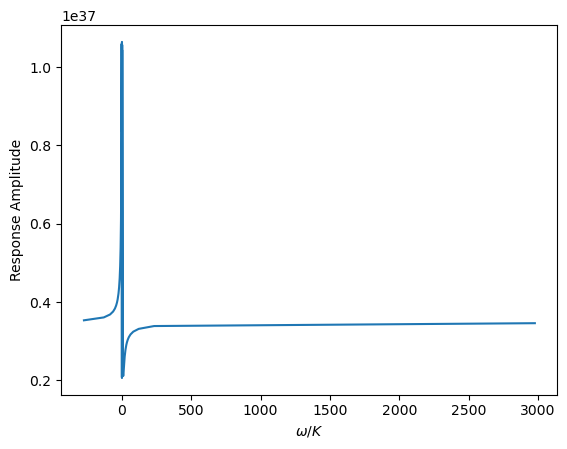

In [65]:
dx = 0.01
dy = 0.01
x = np.arange(-np.pi/32, np.pi/32, dx)
y = np.arange(-np.pi/32, np.pi/32, dy)

dt = 0.01
t = np.arange(0,0.3,dt)

dK = 0.1
K = np.arange(-360/np.pi, 360/np.pi, dK)

xs, ys, ts, Ks = np.meshgrid(x, y, t, K, indexing='ij')

psi = np.pi/9
c=0.02
xs = xs*np.cos(psi)-c*ts*np.sin(psi)
ts = ts*np.cos(psi)+xs/c * np.sin(psi)

sigma = np.pi/180
w = 8*np.pi
k = 360/np.pi
alpha = 1/0.020

gratings = np.cos(Ks*xs-w*ts)
ds = gabor_filter(xs, ys, sigma, sigma, k, 0)
dt = get_single_phase_temporal_kernel(alpha, ts)
l = np.sum(ds*gratings*dt, axis=(0,1))*(dx*dy)

response_amplitudes = [np.sqrt(np.dot(l[:,i], l[:,i])) for i in range(len(K))]

v, ra = zip(*sorted(zip((w/K),response_amplitudes), key = lambda x: x[0]))
plt.plot(v, ra)
plt.xlabel(r'$\omega/K$')
plt.ylabel(r'Response Amplitude');

## Solution 12.2

## Exercise 13
Construct a model complex cell that is disparity tuned but insensitive to the absolute position of a grating. The complex cell is constructed by summing the squares of the unrectified linear responses of two simple cells, but disparity effects are now included. For this exercise, we ignore temporal factors and only consider the spatial dependence of the response. Each simple cell response is composed of two terms that correspond to inputs coming from the left and right eyes. Because of disparity, the spatial phases of the image of a grating in the two eyes $\Phi_L$ and $\Phi_R$ may be different. We write the spatial part of the linear response estimate for a grating with the preferred spatial frequency $(k=K)$ and orientation $(\Theta=\theta=0)$ as $$L_1=\frac{A}{2}\left(\cos(\Phi_L)+\cos(\Phi_R)\right),$$ assuming that $\phi=0$ (this equation is a generalization of equation 2.34). Let the complex cell response be proportional to $L_1^2+L_2^2$ where $L_2$ is similar to $L_1$ except that the cosine functions are replaced by sine functions.
1. Show that the response of this neuron is tuned to the disparity, $\Phi_L-\Phi_R$, but is independent of the absolute spatial phase of the grating $\Phi_L+\Phi_R$.
2. Plot the response tuning curve as a function
of disparity. (See DeAngelis, GC, Ohzawa, I, & Freeman, RD (1991)
Depth is encoded in the visual cortex by a specialized receptive field
structure. *Nature* **352**:156–159.)

## Solution 13.1
We can show this analytically by observing that $$L_1^2+L_2^2 = \left(\frac{A}{2}(\cos(\Phi_L)+\cos(\Phi_R)) \right)^2+\left(\frac{A}{2}(\sin(\Phi_L)+\sin(\Phi_R)) \right)^2$$ which can be rewritten as $$\frac{A^2}{4}((\cos^2(\Phi_L) + \sin^2(\Phi_L)) + 2(\cos(\Phi_L)\cos(\Phi_R)+\sin(\Phi_L)\sin(\Phi_R)) + (\cos^2(\Phi_R) + \sin^2(\Phi_R))). $$ And using the rule $\sin^2(\theta)+\cos^2(\theta)=1$ we can simplify the expression to get $$\frac{A^2}{2}(1+(\cos(\Phi_L)\cos(\Phi_R)+\sin(\Phi_L)\sin(\Phi_R))). $$ Finally, we can use the trigonometric identity $\cos(a)\cos(b)+\sin(a)\sin(b)=\cos(a-b) $ to get $$L_1^2+L_2^2 = \frac{A^2}{2}(1+\cos(\Phi_L-\Phi_R)).$$ Which is dependent on the disparity $(\Phi_L-\Phi_R)$ but not the absolute spatial phase of the grating $(\Phi_L+\Phi_R)$

## Solution 13.2
We can now implement the response as described by the expression we derived above and plot it as a function of $(\Phi_L-\Phi_R)$.

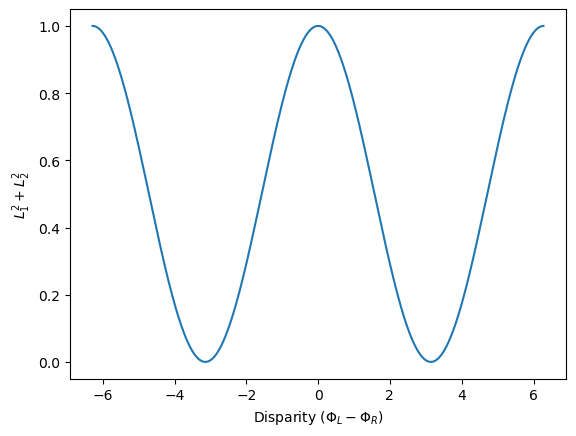

In [6]:
disparity = np.arange(-2*np.pi, 2*np.pi, 0.01)

A=1

response = A**2/2 * (1+np.cos(disparity))
plt.plot(disparity, response)
plt.xlabel(r'Disparity $(\Phi_L-\Phi_R)$')
plt.ylabel(r'$L_1^2+L_2^2$');

## Exercise 14

Determine the selectivity of the LGN receptive field of equations 2.45 to spatial frequency by computing its integrals when multiplied by
the stimulus $$s=\cos(Kx)$$ for a range of $K$ values. Use $\sigma_{cen}=0.3\degree,\ \sigma_{sur}=1.5\degree,\ B=5,\ 1/\alpha=16 $ ms and plot the resulting spatial frequency tuning curve.

## Solution 14
Equation 2.45 gives $$D_{s}\left(x,y\right)=\pm\left(\frac{1}{2\pi\sigma_{cen}^{2}}\exp\left(-\frac{x^{2}+y^{2}}{2\sigma_{cen}^{2}}\right)-\frac{B}{2\pi\sigma_{sur}^{2}}\exp\left(-\frac{x^{2}+y^{2}}{2\sigma_{sur}^{2}}\right)\right). $$ We can implement the spatial kernel as described and then compute the selectivity to spatial frequency as in other exercises. 

In [ ]:
def get_lgn_spatial_kernel(x, y, sigma_c, sigma_s, B):
    """Returns the value of the LGN spatial receptive kernel.
    
    Parameters
    ----------
    x : {float, array_like}
        The x coordinate relative to the center of the kernel.
    y :  {float, array_like}
        The y coordinate relative to the center of the kernel.
    sigma_c : float
        The control parameter for the center of the receptive field.
    sigma_s : float
        The control parameter for the surround of the receptive field.
    B : float
        The weight of the surround of the receptive field relative to the center.
    """

    D_s = 1/(2*np.pi*sigma_c**2) * np.exp(-(x**2+y**2)/(2*sigma_c**2))
    D_s -= -B/(2*np.pi*sigma_s**2) * np.exp(-(x**2+y**2)/(2*sigma_s**2))
    
    return D_s

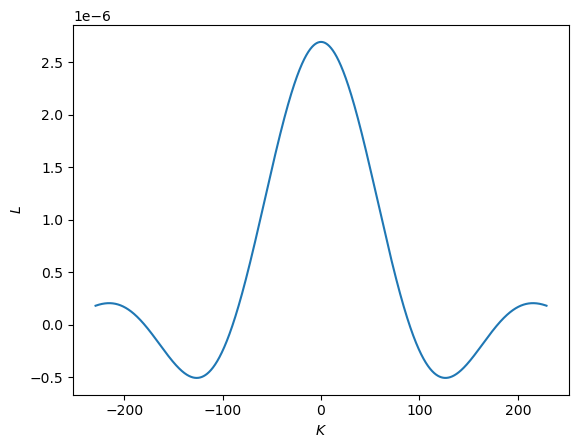

In [31]:
dx = 0.01
dy = 0.01
x = np.arange(-2*np.pi/180, 2*np.pi/180, dx)
y = np.arange(-2*np.pi/180, 2*np.pi/180, dy)

dK = 0.1
K = np.arange(-720/np.pi, 720/np.pi, dK)

xs, ys, Ks = np.meshgrid(x, y, K, indexing='ij')

sigma_c = 180/(0.3*np.pi)
sigma_s = 180/(1.5*np.pi)
B=5

D_s = get_lgn_spatial_kernel(xs,ys, sigma_c, sigma_s, B)
s = np.cos(Ks*xs)

L = np.sum(D_s*s*dx*dy, axis = (0,1))
plt.plot(K, L)
plt.xlabel(r'$K$')
plt.ylabel(r'$L$');


From the plot above we can see that the preferred spatial frequency of the cell is $K=0$.

## Exercise 15
1. Construct the Hubel-Wiesel model of a simple-cell spatial receptive field, as depicted in figure 2.27A. Use difference-of-Gaussian functions (equation 2.45) to model the LGN receptive fields. Plot the spatial receptive field of the simple cell constructed by summing the spatial receptive fields of the LGN cells that provide its input.
2. Compare the result of summing appropriately placed LGN centersurround receptive fields (figure 2.27A) with the results of an appropriately adjusted Gabor filter model of the simple cell that uses the spatial kernel of equation 2.27.

## Solution 15.1
The Hubel-Wiesel model diagram in figure 2.27A is shown below: 

![image](data/c2p15.png)

We can see that in the diagram the receptive fields are aligned such that the receptive field center regions border one another. The LGN spatial receptive fields are given by the equation $$D_{s}\left(x,y\right)=\pm\left(\frac{1}{2\pi\sigma_{cen}^{2}}\exp\left(-\frac{x^{2}+y^{2}}{2\sigma_{cen}^{2}}\right)-\frac{B}{2\pi\sigma_{sur}^{2}}\exp\left(-\frac{x^{2}+y^{2}}{2\sigma_{sur}^{2}}\right)\right). $$ So if we take with $\sigma_{cen}=0.3\degree,\ \sigma_{sur}=1.5\degree$ and $B=5$ as in [exercise 14](##exercise-14) we can find the borders of the center region of the receptive field by solving $$D_{s}\left(x,y\right)=0.$$ However,  $D_s(x,y)=0$ defines a circle about the origin, so we can find the radius by solving in the case $y=0$ which yields radius $\approx 0.549336\degree$. So, we can define receptive fields of the adjacent cells by offsetting the origin appropriately.  

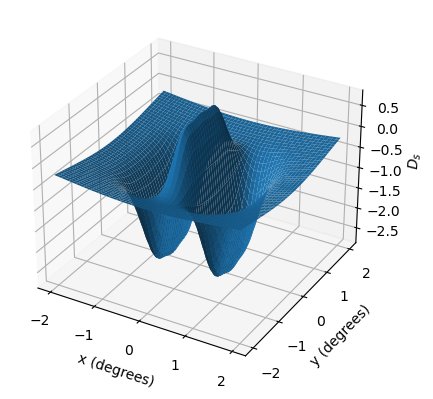

In [28]:
dx = 0.01
dy = 0.01
x = np.arange(-2, 2, dx)
y = np.arange(-2, 2, dy)

xs, ys = np.meshgrid(x, y)

sigma_c = 0.3
sigma_s = 1.5
B=5
offset = sigma_c
#0.549336

D_s = get_lgn_spatial_kernel(xs, ys, sigma_c, sigma_s, B)
D_s += get_lgn_spatial_kernel(xs, ys+2*offset, sigma_c, sigma_s, B)
D_s += get_lgn_spatial_kernel(xs, ys-2*offset, sigma_c, sigma_s, B)
D_s -= get_lgn_spatial_kernel(xs-2*offset, ys, sigma_c, sigma_s, B)
D_s -= get_lgn_spatial_kernel(xs-2*offset, ys+2*offset, sigma_c, sigma_s, B)
D_s -= get_lgn_spatial_kernel(xs-2*offset, ys-2*offset, sigma_c, sigma_s, B)
D_s -= get_lgn_spatial_kernel(xs+2*offset, ys, sigma_c, sigma_s, B)
D_s -= get_lgn_spatial_kernel(xs+2*offset, ys+2*offset, sigma_c, sigma_s, B)
D_s -= get_lgn_spatial_kernel(xs+2*offset, ys-2*offset, sigma_c, sigma_s, B)

ax = plt.axes(projection='3d')

ax.plot_surface(xs, ys, D_s)
ax.set_xlabel("x (degrees)")
ax.set_ylabel("y (degrees)")
ax.set_zlabel(r'$D_s$');

## Solution 15.2

## Exercise 16
1. Construct the Hubel-Wiesel model of a complex cell, as depicted in figure 2.27B. Use Gabor functions (equation 2.27) to model the simple cell responses, which should be rectified before being summed. Plot the spatial receptive field of the complex cell constructed by summing the different simple cell responses. 
2. Compare the responses of a complex cell constructed by linearly summing the outputs of simple cells (figure 2.27B) with different spatial phase preferences with the complex cell model obtained by squaring and summing two unrectified simple cell responses with spatial phases $90\degree$ apart as in [exercise 8](##exercise-8).

## Solution 16.1

## Solution 16.2